In [36]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multiclass import OneVsRestClassifier
from numpy import nan
from mlxtend.classifier import StackingCVClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [3]:
import sweetviz
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [112]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [113]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [473]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [115]:
swveda = sweetviz.compare([train, 'Train'], [test, 'Test'], "Is_Lead")

                                             |                                             | [  0%]   00:00 ->…

In [116]:
swveda.show_html('SWVReport.html')

Report SWVReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [117]:
av = AutoViz_Class()

Shape of your Data Set: (245725, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    10 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 245725 exceeds maximum, randomly sampling 150000 rows for EDA...

################ Binary_Classification VISUALIZATION Started #####################


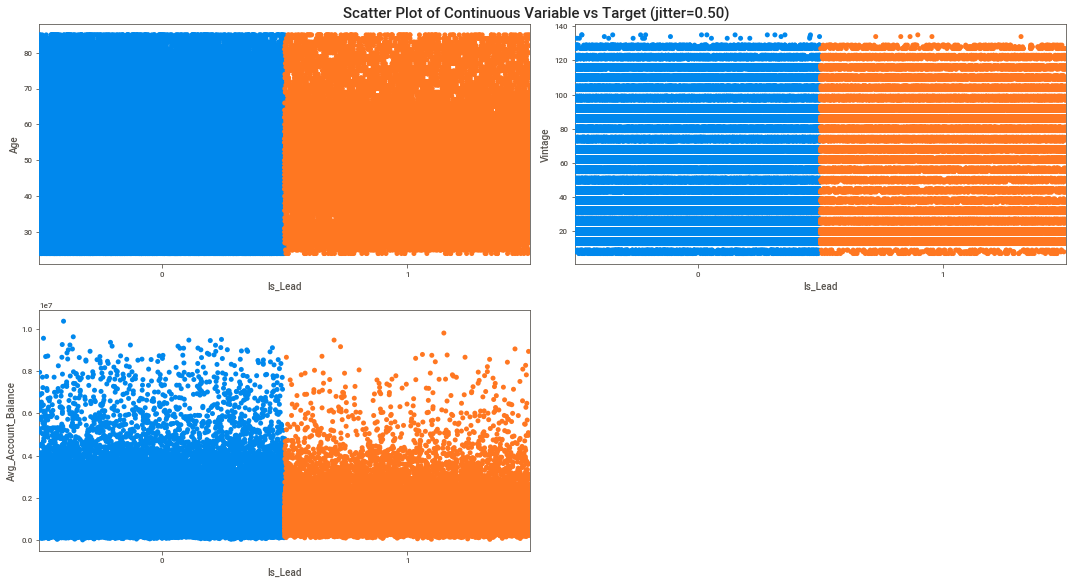

Total Number of Scatter Plots = 6


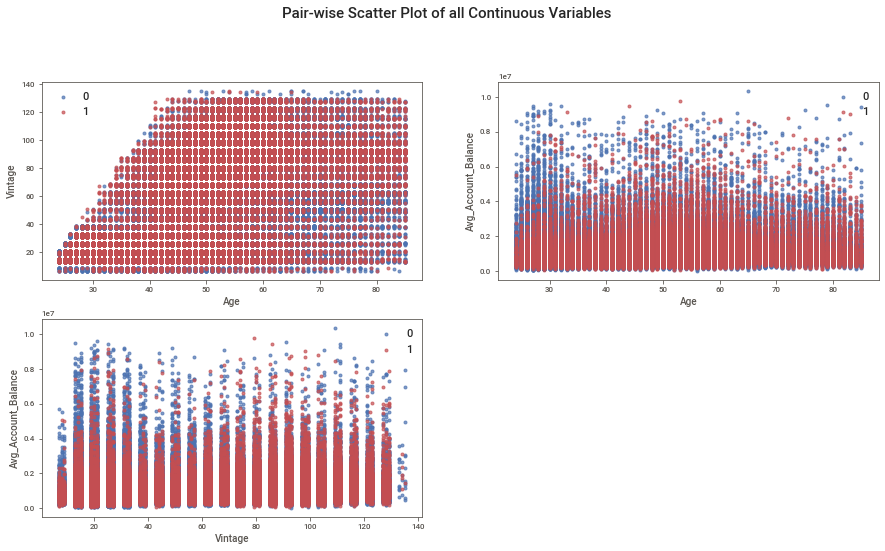

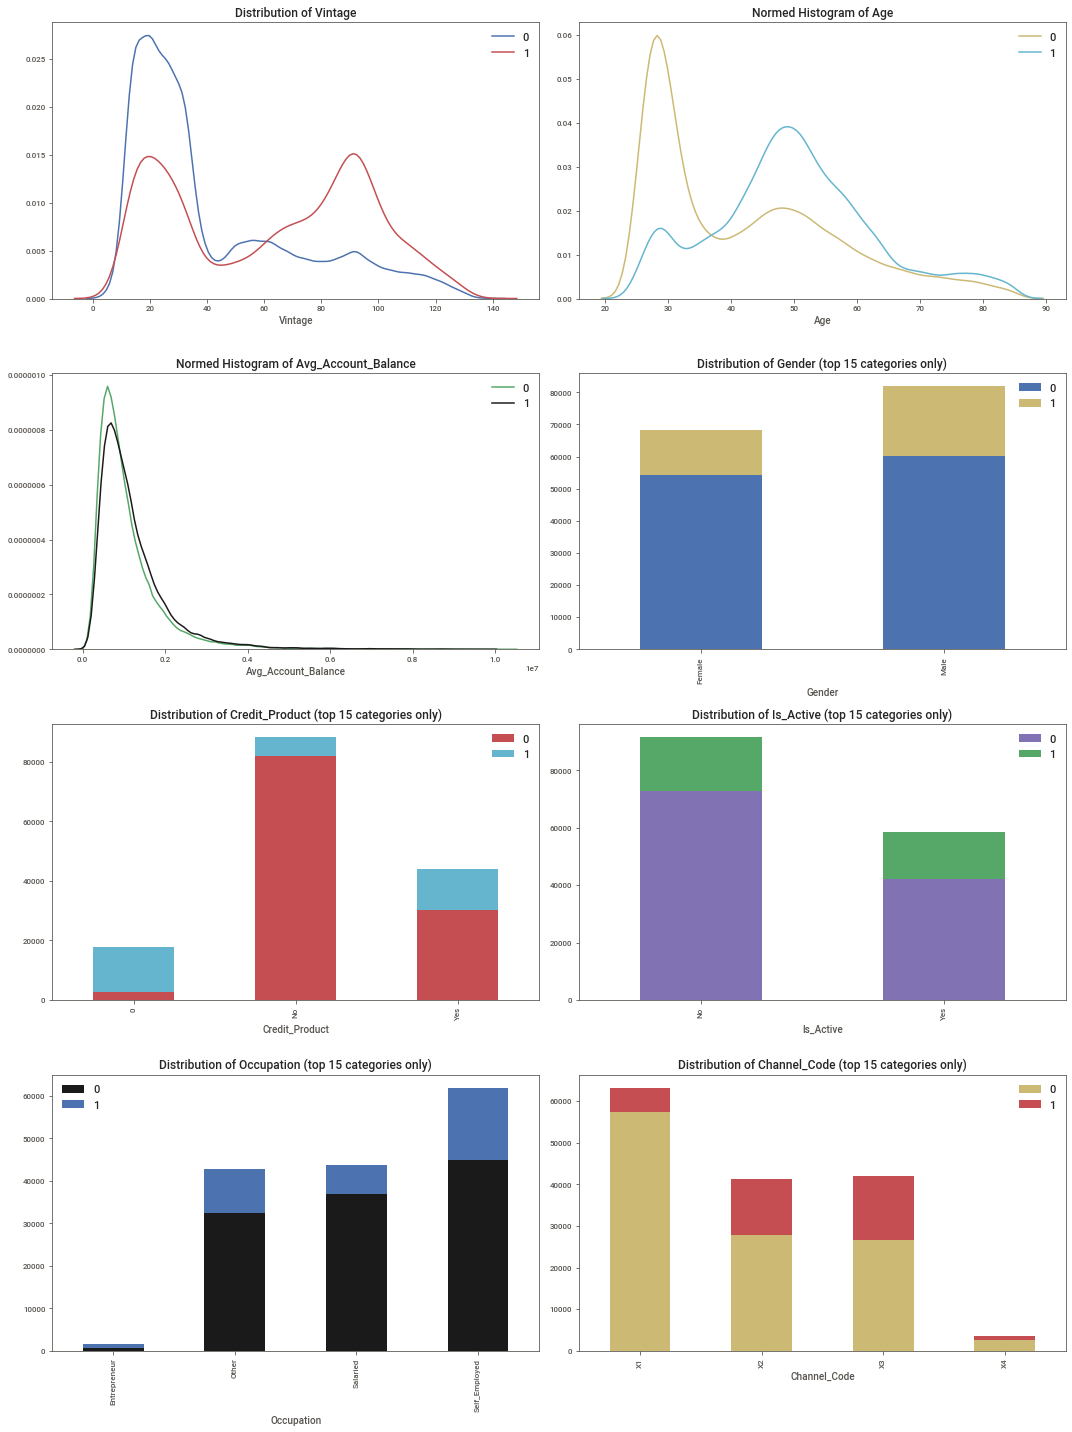

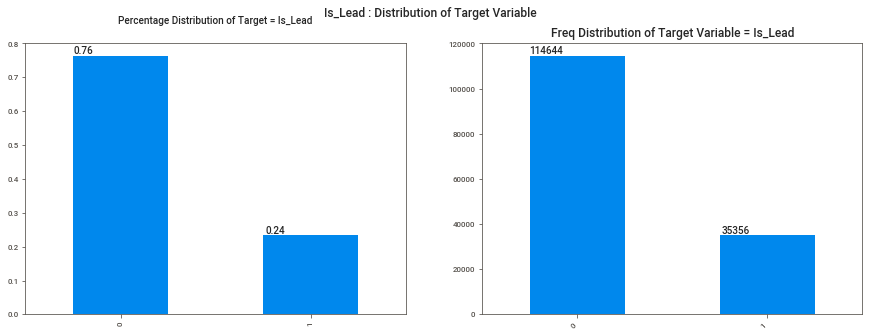

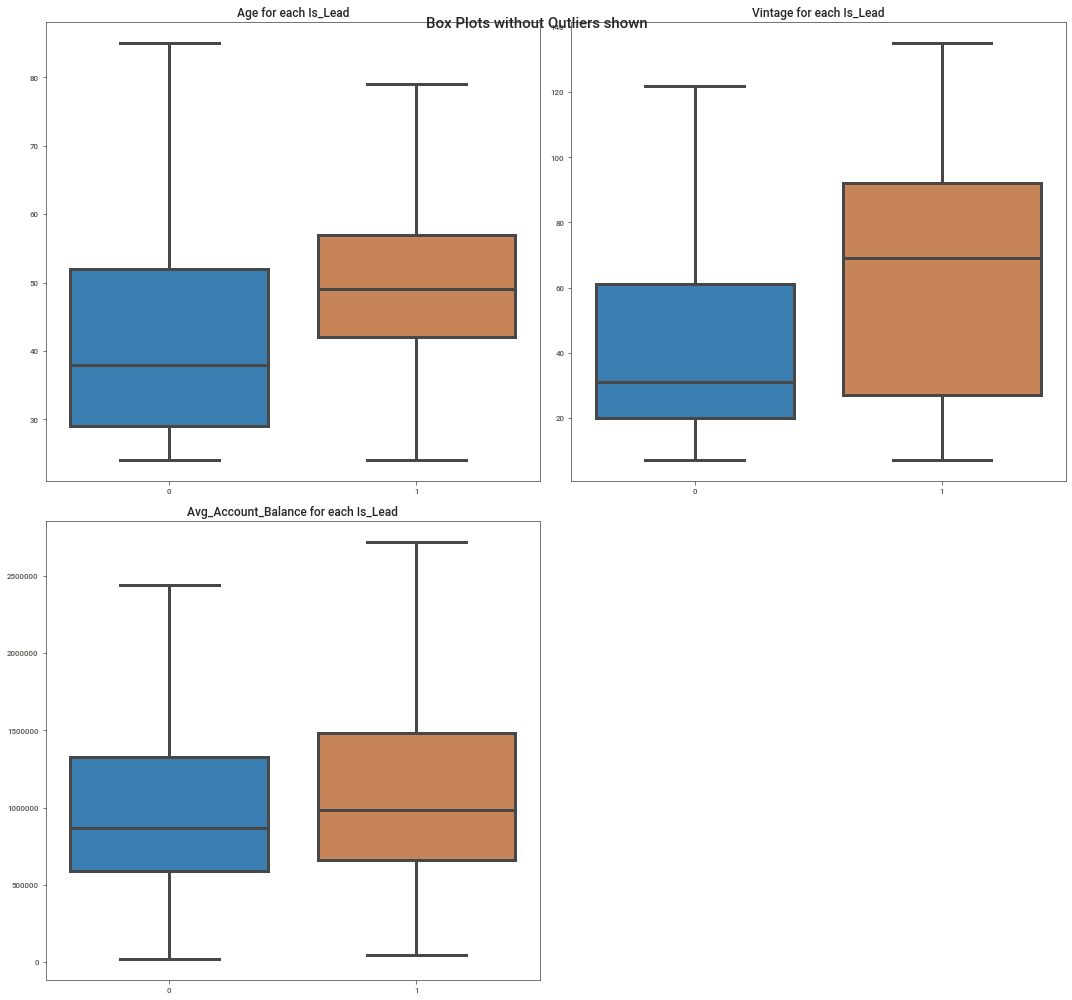

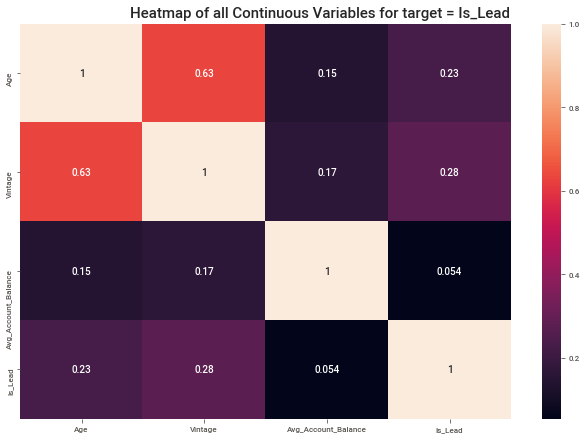

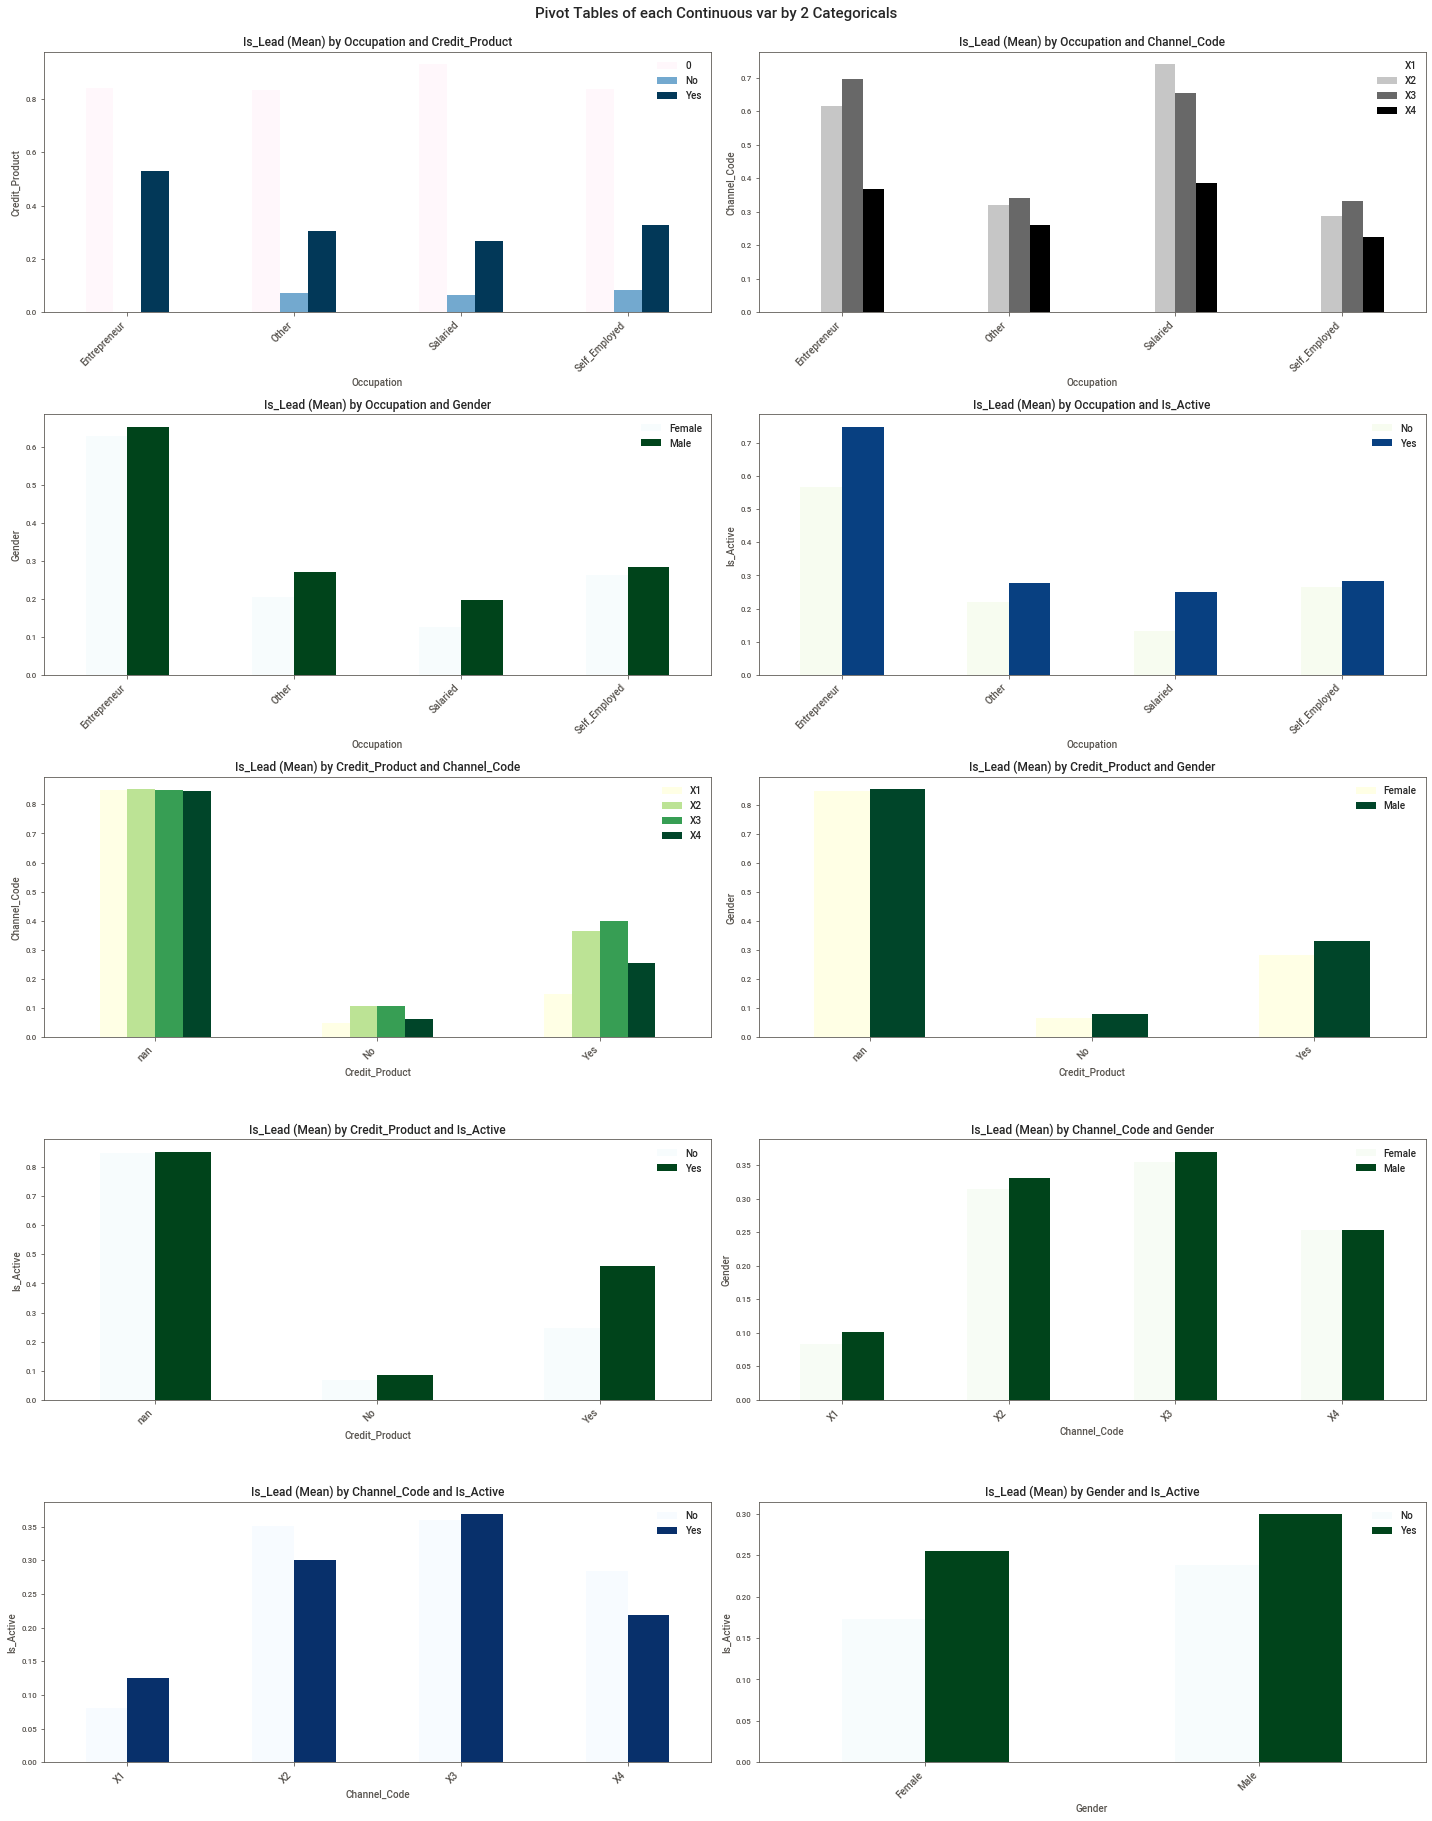

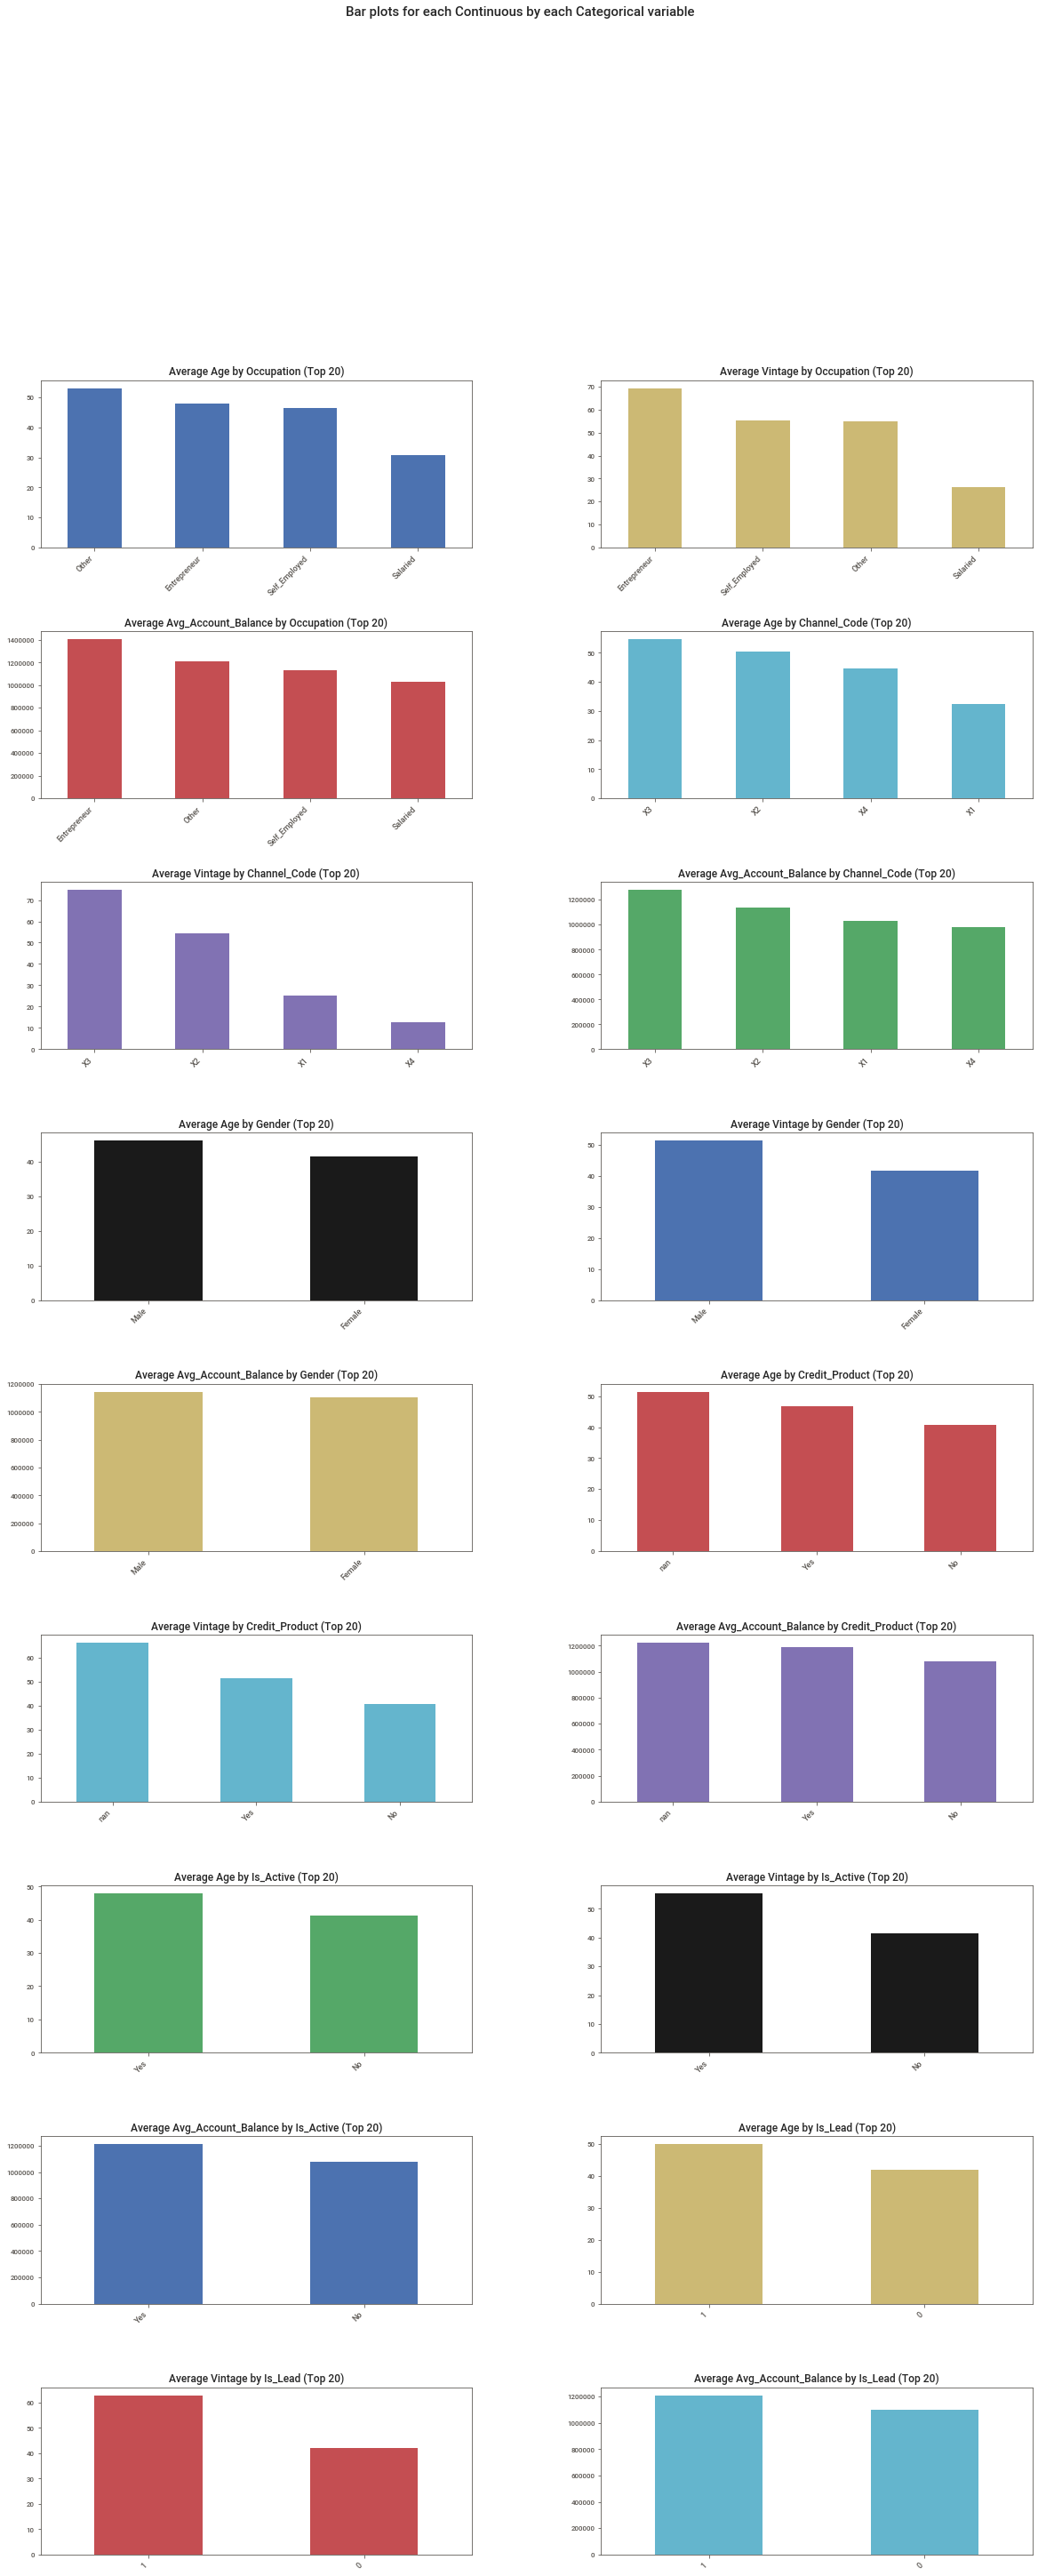

Time to run AutoViz (in seconds) = 45.723

 ###################### VISUALIZATION Completed ########################


In [118]:
filename = "train.csv"
sep = ","
dft = av.AutoViz(
    filename,
    sep=",",
    depVar="Is_Lead",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [8]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.682. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.46.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (245725, 11)
    Training Set Memory Usage = 20.62 MB
Test Set Shape = (105312, 10)
    Test Set Memory Usage = 8.03 MB
Single_Label Target: ['Is_Lead']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:  187437  ->   76.3%
           1:   58288  ->   23.7%
    Target Is_Lead is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Fac

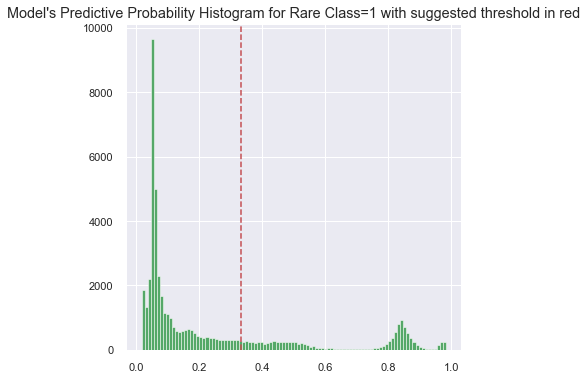

    Using threshold=0.5. However, 0.333 provides better F1=0.69 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 84.7%
Balanced Accuracy = 75.34% with Threshold = 0.50
Confusion Matrix:
[[35861  1626]
 [ 5243  6415]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37487
           1       0.80      0.55      0.65     11658

    accuracy                           0.86     49145
   macro avg       0.84      0.75      0.78     49145
weighted avg       0.85      0.86      0.85     49145

Balanced Accuracy = 79.80% with Threshold = 0.33
Confusion Matrix:
[[33436  4051]
 [ 3449  8209]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     37487
           1       0.67      0.70      0.69     11658

    accuracy                           0.85     49145
   macro avg       0.79    

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 174
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
Error in Stacking second time. Continuing...
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.65548691 2.10785239]
    class_weighted_rows = {0: 187437, 1: 122862}
Regression-resampler is erroring. Continuing...
    Model Training time taken = 52 seconds
     Actual Training time taken in seconds = 99
Training of models completed. Now st

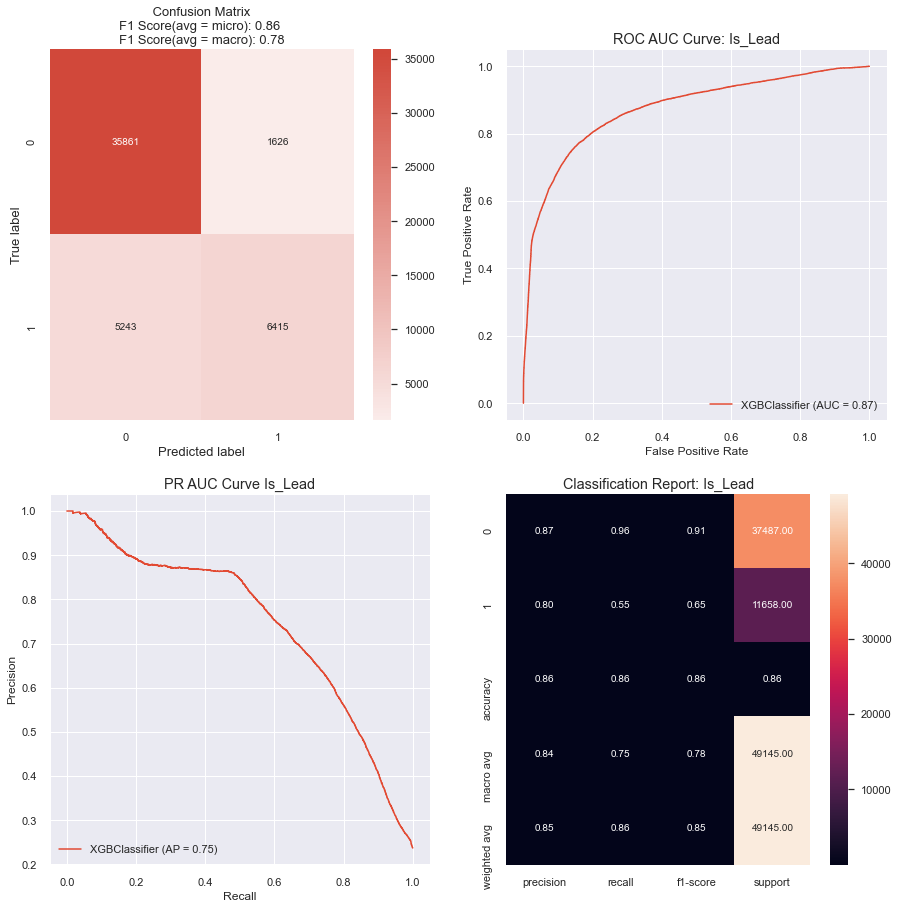

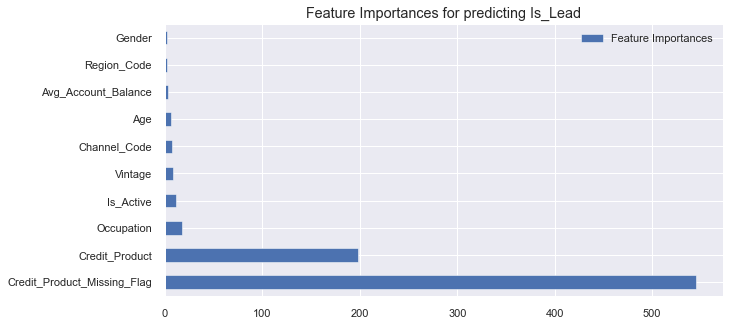

In [9]:
target = 'Is_Lead'
model1, features1, trainv, testv = Auto_ViML(train, target, test, sample_submission='',
                                           scoring_parameter = 'balanced_Accuracy',
                                          hyper_param = 'RS',
                                          feature_reduction=True,
                                          Boosting_Flag= True,
                                          Binning_Flag=True,
                                          Add_Poly=0,
                                          Stacking_Flag=True,
                                          Imbalanced_Flag=True,
                                          verbose=1)

In [4]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test])


In [11]:
model1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, predictor='cpu_predictor',
              random_state=1, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              seed=1, subsample=0.7, tree_method='hist',
              updater='grow_colmaker', ...)

In [121]:
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="pdprofile_min.html") 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [122]:
df.shape 

(351037, 12)

In [123]:
features1

['Credit_Product',
 'Credit_Product_Missing_Flag',
 'Occupation',
 'Is_Active',
 'Vintage',
 'Channel_Code',
 'Age',
 'Avg_Account_Balance',
 'Gender',
 'Region_Code']

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 34.8+ MB


In [7]:
df['Gender'].value_counts()

Male      191902
Female    159135
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [9]:
df['Region_Code'] = df['Region_Code'].str[-3:]

In [10]:
df['Region_Code'] = df['Region_Code'].astype(int)

In [11]:
df['Occupation'].value_counts()

Self_Employed    144078
Salaried         102912
Other            100304
Entrepreneur       3743
Name: Occupation, dtype: int64

In [12]:
occ = pd.get_dummies(df['Occupation'])

In [13]:
df = pd.concat([df, occ], axis = 1)

In [14]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source,Entrepreneur,Other,Salaried,Self_Employed
0,NNVBBKZB,1,73,268,Other,X3,43,No,1045696,No,0.0,train,0,1,0,0
1,IDD62UNG,1,30,277,Salaried,X1,32,No,581988,No,0.0,train,0,0,1,0
2,HD3DSEMC,1,56,268,Self_Employed,X3,26,No,1484315,Yes,0.0,train,0,0,0,1
3,BF3NC7KV,0,34,270,Salaried,X1,19,No,470454,No,0.0,train,0,0,1,0
4,TEASRWXV,1,30,282,Salaried,X1,33,No,886787,No,0.0,train,0,0,1,0


In [15]:
del df['Occupation']

In [16]:
df['Credit_Product'].value_counts()

No     205965
Yes    103225
Name: Credit_Product, dtype: int64

In [17]:
df['Credit_Product'] = df['Credit_Product'].replace({'Yes':1 , 'No':0})

In [18]:
df['Channel_Code'].value_counts()

X1    148202
X3     97981
X2     96902
X4      7952
Name: Channel_Code, dtype: int64

In [19]:
df['Is_Active'].value_counts()

No     214087
Yes    136950
Name: Is_Active, dtype: int64

In [20]:
df['Is_Lead'].value_counts()

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64

In [21]:
df['Is_Active'] = df['Is_Active'].replace({'Yes':1 , 'No':0})

In [22]:
df['Is_Lead'] = df['Is_Lead'].replace({'Yes':1 , 'No':0})

In [23]:
df['Channel_Code'] = df['Channel_Code'].str[-1:]
df['Channel_Code'] = df['Channel_Code'].astype(int)

In [256]:
Xtrain =df[df['Credit_Product'].isnull()==False] 
Xtest=df[df['Credit_Product'].isnull()==True] 

In [257]:
Xtrain['Credit_Product'].value_counts()

0.00    205965
1.00    103225
Name: Credit_Product, dtype: int64

In [258]:
Xtest.shape

(41847, 15)

In [259]:
strID = Xtrain.pop('ID')
strsource = Xtrain.pop('source')
stry = Xtrain.pop('Credit_Product')
strlead = Xtrain.pop('Is_Lead')

In [260]:
steID = Xtest.pop('ID')
stesource = Xtest.pop('source')
stey = Xtest.pop('Credit_Product')
stelead = Xtest.pop('Is_Lead')

In [261]:
Xtest.columns

Index(['Gender', 'Age', 'Region_Code', 'Channel_Code', 'Vintage',
       'Avg_Account_Balance', 'Is_Active', 'Entrepreneur', 'Other', 'Salaried',
       'Self_Employed'],
      dtype='object')

In [262]:
xgb = XGBClassifier(n_estimators= 200, min_child_weight= 1, max_depth= 5, gamma= 0.0, colsample_bytree= 0.5)

In [263]:
xgb.fit(Xtrain, stry)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [264]:
print(accuracy_score(stry,xgb.predict(Xtrain))*100)

74.05737572366506


In [265]:
stey = xgb.predict(Xtest)

In [266]:
Xtest['Credit_Product'] = stey 
Xtest['Credit_Product'].value_counts()

0.00    21199
1.00    20648
Name: Credit_Product, dtype: int64

In [267]:
Xtest.shape

(41847, 12)

In [268]:
Xtrain = pd.concat([Xtrain, stry, strID, strsource,  strlead], axis = 1)

In [269]:
Xtrain.shape

(309190, 15)

In [270]:
Xtest = pd.concat([Xtest, steID, stesource, stelead], axis = 1)

In [271]:
Xtest

,Gender,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,Self_Employed,Credit_Product,ID,source,Is_Lead
6,0,62,282,3,20,1056750,1,0,1,0,0,0.00,ETQCZFEJ,train,1.00
15,0,33,268,2,69,517063,1,0,0,0,1,0.00,UJ2NJKKL,train,1.00
31,1,32,279,4,15,1072850,1,0,0,1,0,0.00,ABPMK4WU,train,1.00
36,1,41,268,3,62,962383,0,0,0,0,1,0.00,MTEIXMB9,train,1.00
40,1,63,254,3,103,1249319,1,0,1,0,0,0.00,6WX9JDVK,train,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105260,0,45,270,3,117,582015,1,0,0,1,0,1.00,ZXCWURWZ,test,NaN
105266,0,46,256,2,86,488022,1,0,0,0,1,0.00,RKSESPFM,test,NaN
105272,0,48,268,2,91,1228271,1,0,0,0,1,0.00,EPJEMD9H,test,NaN
105286,0,58,277,3,80,750421,1,0,0,0,1,0.00,GWVNNKSG,test,NaN


In [272]:
Xtrain

,Gender,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,Self_Employed,Credit_Product,ID,source,Is_Lead
0,1,73,268,3,43,1045696,0,0,1,0,0,0.00,NNVBBKZB,train,0.00
1,1,30,277,1,32,581988,0,0,0,1,0,0.00,IDD62UNG,train,0.00
2,1,56,268,3,26,1484315,1,0,0,0,1,0.00,HD3DSEMC,train,0.00
3,0,34,270,1,19,470454,0,0,0,1,0,0.00,BF3NC7KV,train,0.00
4,1,30,282,1,33,886787,0,0,0,1,0,0.00,TEASRWXV,train,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,0,52,268,2,86,4242558,1,0,0,1,0,1.00,DBENJOYI,test,NaN
105308,0,55,277,2,86,1159153,0,0,1,0,0,1.00,CWQ72DWS,test,NaN
105309,0,35,254,4,15,1703727,0,0,0,1,0,0.00,HDESC8GU,test,NaN
105310,0,53,254,3,93,737178,1,0,1,0,0,0.00,2PW4SFCA,test,NaN


In [274]:
df1 = pd.concat([Xtrain, Xtest])

In [275]:
df1

,Gender,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Entrepreneur,Other,Salaried,Self_Employed,Credit_Product,ID,source,Is_Lead
0,1,73,268,3,43,1045696,0,0,1,0,0,0.00,NNVBBKZB,train,0.00
1,1,30,277,1,32,581988,0,0,0,1,0,0.00,IDD62UNG,train,0.00
2,1,56,268,3,26,1484315,1,0,0,0,1,0.00,HD3DSEMC,train,0.00
3,0,34,270,1,19,470454,0,0,0,1,0,0.00,BF3NC7KV,train,0.00
4,1,30,282,1,33,886787,0,0,0,1,0,0.00,TEASRWXV,train,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105260,0,45,270,3,117,582015,1,0,0,1,0,1.00,ZXCWURWZ,test,NaN
105266,0,46,256,2,86,488022,1,0,0,0,1,0.00,RKSESPFM,test,NaN
105272,0,48,268,2,91,1228271,1,0,0,0,1,0.00,EPJEMD9H,test,NaN
105286,0,58,277,3,80,750421,1,0,0,0,1,0.00,GWVNNKSG,test,NaN


In [276]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105295
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               351037 non-null  int64  
 1   Age                  351037 non-null  int64  
 2   Region_Code          351037 non-null  int32  
 3   Channel_Code         351037 non-null  int32  
 4   Vintage              351037 non-null  int64  
 5   Avg_Account_Balance  351037 non-null  int64  
 6   Is_Active            351037 non-null  int64  
 7   Entrepreneur         351037 non-null  uint8  
 8   Other                351037 non-null  uint8  
 9   Salaried             351037 non-null  uint8  
 10  Self_Employed        351037 non-null  uint8  
 11  Credit_Product       351037 non-null  float64
 12  ID                   351037 non-null  object 
 13  source               351037 non-null  object 
 14  Is_Lead              245725 non-null  float64
dtypes: float64(2), in

In [328]:
train1 = df1[df1['source'] == 'train']
test1 = df1[df1['source'] == 'test']

In [278]:
train1.shape

(245725, 15)

In [279]:
test1.shape

(105312, 15)

In [329]:
del train1['source']
del train1['ID']
del test1['source']
del test1['ID']
del test1['Is_Lead']
 

In [330]:
y1 = train1.pop('Is_Lead')

In [284]:
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, predictor='cpu_predictor',
              random_state=1, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              seed=1, subsample=0.7, tree_method='hist',
              updater='grow_colmaker')

In [286]:
xg.fit(train1, y1 )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, predictor='cpu_predictor',
              random_state=1, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              seed=1, subsample=0.7, tree_method='hist',
              updater='grow_colmaker', ...)

In [293]:
ytest1 = xg.predict(test1)
ytrain1 = xg.predict(train1)

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (245725, 13)
    Training Set Memory Usage = 17.81 MB
Test Set Shape = (105312, 12)
    Test Set Memory Usage = 6.83 MB
Single_Label Target: ['Is_Lead']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
         0.0:  187437  ->   76.3%
         1.0:   58288  ->   23.7%
    Target Is_Lead is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  0
    Number of Fac

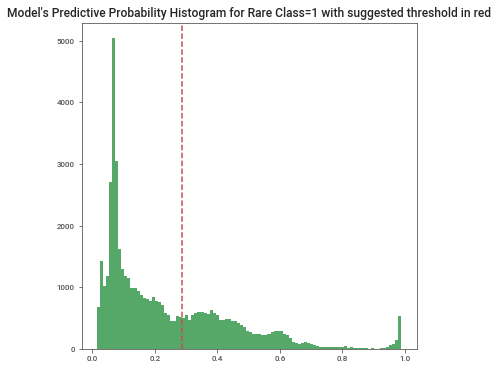

    Using threshold=0.5. However, 0.288 provides better F1=0.57 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 75.3%
Balanced Accuracy = 63.80% with Threshold = 0.50
Confusion Matrix:
[[35703  1784]
 [ 7885  3773]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     37487
           1       0.68      0.32      0.44     11658

    accuracy                           0.80     49145
   macro avg       0.75      0.64      0.66     49145
weighted avg       0.79      0.80      0.78     49145

Balanced Accuracy = 73.04% with Threshold = 0.29
Confusion Matrix:
[[29013  8474]
 [ 3650  8008]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83     37487
           1       0.49      0.69      0.57     11658

    accuracy                           0.75     49145
   macro avg       0.69    

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 167
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Time taken for Stacking: 5.5 seconds
    Adding 2 Stacking feature(s) to training data
    Time taken for Stacking: 0.5 seconds
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.65548691 2.10785239]
    class_weighted_rows = {0: 187437, 1: 122862}
Regression-resampler is erroring. Continuing...
    Model Training time taken = 226 seco

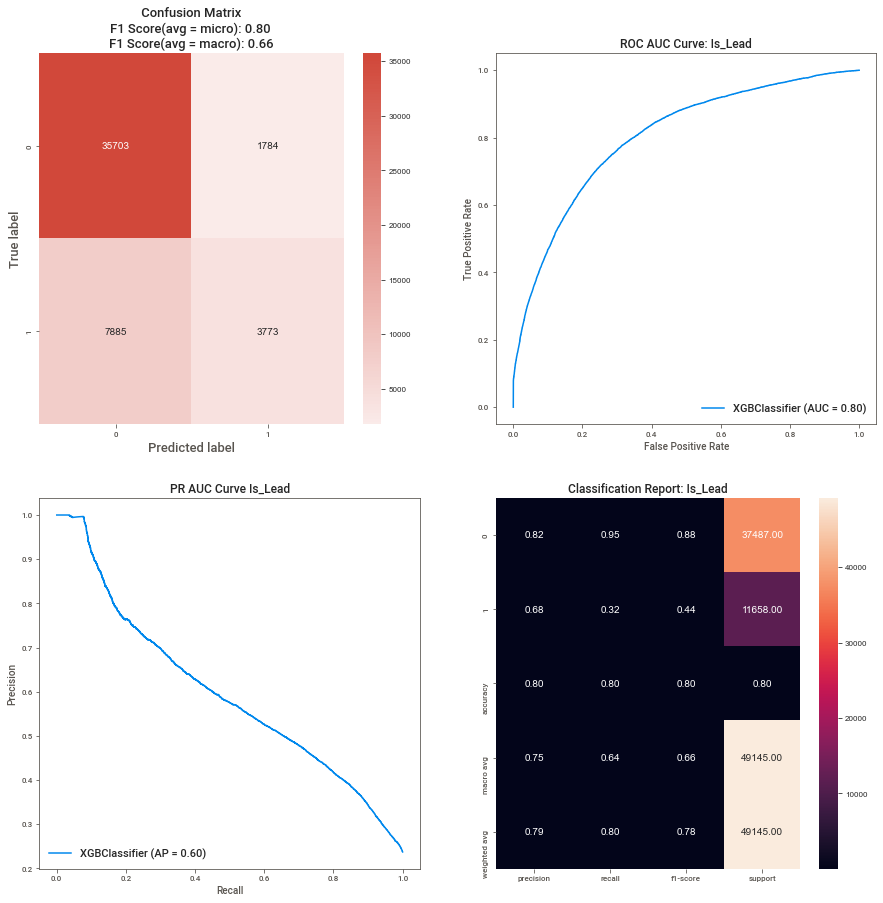

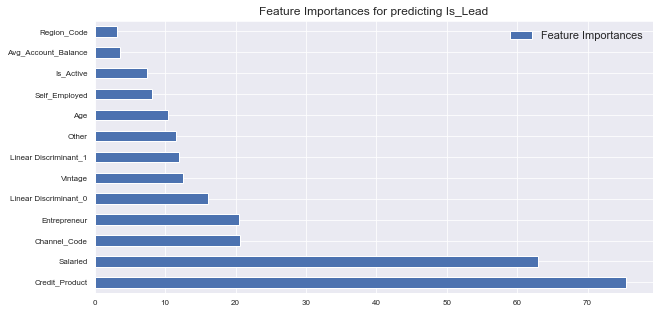

In [305]:
target = 'Is_Lead'
model1, features1, trainv, testv = Auto_ViML(train1, target, test1, sample_submission='',
                                           scoring_parameter = 'balanced_Accuracy',
                                          hyper_param = 'RS',
                                          feature_reduction=True,
                                          Boosting_Flag= True,
                                          Binning_Flag=True,
                                          Add_Poly=0,
                                          Stacking_Flag=True,
                                          Imbalanced_Flag=True,
                                          verbose=1)

In [307]:
model1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, predictor='cpu_predictor',
              random_state=1, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              seed=1, subsample=0.7, tree_method='hist',
              updater='grow_colmaker', ...)

In [340]:
model_params = {
     'cat': {
        'model': CatBoostClassifier(eval_metric='Accuracy'),
        'params' : {
            'n_estimators': [10, 100, 200, 500],
            'max_depth': [5, 10, 15, 20, 25] ,
            'l2_leaf_reg': [5, 10, 15, 20, 25] ,
            'learning_rate' : [0.2, 0.6, 0.4, 0.8],
            'bagging_temperature' : [0.2, 0.6, 0.4, 0.8]
        }
        }
          
}

In [341]:
scores = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False, verbose = 1 )
    clf.fit(rtrain, y1)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.7907042	total: 212ms	remaining: 1.91s
1:	learn: 0.7911926	total: 259ms	remaining: 1.04s
2:	learn: 0.7972481	total: 304ms	remaining: 709ms
3:	learn: 0.7986766	total: 349ms	remaining: 523ms
4:	learn: 0.8000867	total: 394ms	remaining: 394ms
5:	learn: 0.8001477	total: 446ms	remaining: 298ms
6:	learn: 0.8007704	total: 493ms	remaining: 211ms
7:	learn: 0.8009230	total: 542ms	remaining: 136ms
8:	learn: 0.8013503	total: 585ms	remaining: 65ms
9:	learn: 0.8012831	total: 636ms	remaining: 0us
0:	learn: 0.7906872	total: 47.6ms	remaining: 428ms
1:	learn: 0.7942033	total: 93.9ms	remaining: 376ms
2:	learn: 0.7941239	total: 144ms	remaining: 337ms
3:	learn: 0.7980613	total: 196ms	remaining: 294ms
4:	learn: 0.7982383	total: 243ms	remaining: 243ms
5:	learn: 0.7985984	total: 294ms	remaining: 196ms
6:	learn: 0.7998987	total: 340ms	remaining: 146ms
7:	learn: 0.8004297	total: 385ms	remaining: 96.3ms
8:	learn: 0.8003748	total: 429ms	remaining: 47.7ms
9:	learn: 0.8005885	total: 476ms	remaining: 0us
0

38:	learn: 0.8011073	total: 789ms	remaining: 1.23s
39:	learn: 0.8010524	total: 809ms	remaining: 1.21s
40:	learn: 0.8010219	total: 828ms	remaining: 1.19s
41:	learn: 0.8010402	total: 846ms	remaining: 1.17s
42:	learn: 0.8012416	total: 865ms	remaining: 1.15s
43:	learn: 0.8012905	total: 886ms	remaining: 1.13s
44:	learn: 0.8013271	total: 904ms	remaining: 1.1s
45:	learn: 0.8012355	total: 921ms	remaining: 1.08s
46:	learn: 0.8012783	total: 941ms	remaining: 1.06s
47:	learn: 0.8011684	total: 957ms	remaining: 1.04s
48:	learn: 0.8011989	total: 977ms	remaining: 1.02s
49:	learn: 0.8013149	total: 996ms	remaining: 996ms
50:	learn: 0.8014614	total: 1.01s	remaining: 975ms
51:	learn: 0.8017117	total: 1.03s	remaining: 954ms
52:	learn: 0.8018887	total: 1.05s	remaining: 935ms
53:	learn: 0.8017849	total: 1.07s	remaining: 914ms
54:	learn: 0.8017056	total: 1.09s	remaining: 892ms
55:	learn: 0.8018093	total: 1.11s	remaining: 872ms
56:	learn: 0.8017910	total: 1.13s	remaining: 851ms
57:	learn: 0.8017605	total: 1.15

0:	learn: 0.7839588	total: 34.5ms	remaining: 311ms
1:	learn: 0.7888607	total: 54.7ms	remaining: 219ms
2:	learn: 0.7883540	total: 72.9ms	remaining: 170ms
3:	learn: 0.7935855	total: 93.6ms	remaining: 140ms
4:	learn: 0.7973885	total: 114ms	remaining: 114ms
5:	learn: 0.7979990	total: 134ms	remaining: 89.2ms
6:	learn: 0.7987315	total: 154ms	remaining: 66ms
7:	learn: 0.7990734	total: 176ms	remaining: 44ms
8:	learn: 0.7990672	total: 199ms	remaining: 22.2ms
9:	learn: 0.7992504	total: 225ms	remaining: 0us
0:	learn: 0.7868414	total: 20.6ms	remaining: 186ms
1:	learn: 0.7887032	total: 40ms	remaining: 160ms
2:	learn: 0.7909069	total: 60.8ms	remaining: 142ms
3:	learn: 0.7925002	total: 80.2ms	remaining: 120ms
4:	learn: 0.7931900	total: 100ms	remaining: 100ms
5:	learn: 0.7954974	total: 119ms	remaining: 79.6ms
6:	learn: 0.7962544	total: 140ms	remaining: 59.8ms
7:	learn: 0.7965779	total: 159ms	remaining: 39.7ms
8:	learn: 0.7975485	total: 182ms	remaining: 20.3ms
9:	learn: 0.7985618	total: 207ms	remaining

126:	learn: 0.9249036	total: 6m 15s	remaining: 18m 21s
127:	learn: 0.9250501	total: 6m 17s	remaining: 18m 17s
128:	learn: 0.9255201	total: 6m 19s	remaining: 18m 12s
129:	learn: 0.9257338	total: 6m 22s	remaining: 18m 8s
130:	learn: 0.9261733	total: 6m 24s	remaining: 18m 4s
131:	learn: 0.9262465	total: 6m 27s	remaining: 18m
132:	learn: 0.9266372	total: 6m 30s	remaining: 17m 56s
133:	learn: 0.9271256	total: 6m 32s	remaining: 17m 52s
134:	learn: 0.9273087	total: 6m 35s	remaining: 17m 48s
135:	learn: 0.9280473	total: 6m 37s	remaining: 17m 44s
136:	learn: 0.9280412	total: 6m 40s	remaining: 17m 40s
137:	learn: 0.9283159	total: 6m 42s	remaining: 17m 35s
138:	learn: 0.9288348	total: 6m 45s	remaining: 17m 31s
139:	learn: 0.9293170	total: 6m 47s	remaining: 17m 27s
140:	learn: 0.9298542	total: 6m 49s	remaining: 17m 23s
141:	learn: 0.9305623	total: 6m 52s	remaining: 17m 19s
142:	learn: 0.9310507	total: 6m 54s	remaining: 17m 15s
143:	learn: 0.9317100	total: 6m 57s	remaining: 17m 10s
144:	learn: 0.93

275:	learn: 0.9667065	total: 12m 55s	remaining: 10m 29s
276:	learn: 0.9668775	total: 12m 58s	remaining: 10m 26s
277:	learn: 0.9669385	total: 13m 1s	remaining: 10m 23s
278:	learn: 0.9670423	total: 13m 4s	remaining: 10m 21s
279:	learn: 0.9671583	total: 13m 6s	remaining: 10m 18s
280:	learn: 0.9673780	total: 13m 9s	remaining: 10m 15s
281:	learn: 0.9674757	total: 13m 12s	remaining: 10m 12s
282:	learn: 0.9675917	total: 13m 15s	remaining: 10m 10s
283:	learn: 0.9677016	total: 13m 18s	remaining: 10m 7s
284:	learn: 0.9676771	total: 13m 21s	remaining: 10m 4s
285:	learn: 0.9678969	total: 13m 24s	remaining: 10m 1s
286:	learn: 0.9680007	total: 13m 27s	remaining: 9m 59s
287:	learn: 0.9683364	total: 13m 30s	remaining: 9m 56s
288:	learn: 0.9682876	total: 13m 33s	remaining: 9m 53s
289:	learn: 0.9684585	total: 13m 36s	remaining: 9m 51s
290:	learn: 0.9686233	total: 13m 39s	remaining: 9m 48s
291:	learn: 0.9688187	total: 13m 42s	remaining: 9m 45s
292:	learn: 0.9688797	total: 13m 45s	remaining: 9m 43s
293:	l

426:	learn: 0.9822484	total: 20m 42s	remaining: 3m 32s
427:	learn: 0.9823338	total: 20m 45s	remaining: 3m 29s
428:	learn: 0.9823583	total: 20m 48s	remaining: 3m 26s
429:	learn: 0.9823949	total: 20m 51s	remaining: 3m 23s
430:	learn: 0.9824193	total: 20m 55s	remaining: 3m 20s
431:	learn: 0.9824559	total: 20m 58s	remaining: 3m 18s
432:	learn: 0.9825780	total: 21m 1s	remaining: 3m 15s
433:	learn: 0.9825658	total: 21m 4s	remaining: 3m 12s
434:	learn: 0.9828710	total: 21m 8s	remaining: 3m 9s
435:	learn: 0.9829138	total: 21m 11s	remaining: 3m 6s
436:	learn: 0.9829992	total: 21m 14s	remaining: 3m 3s
437:	learn: 0.9832800	total: 21m 17s	remaining: 3m
438:	learn: 0.9833533	total: 21m 21s	remaining: 2m 57s
439:	learn: 0.9833472	total: 21m 24s	remaining: 2m 55s
440:	learn: 0.9834326	total: 21m 27s	remaining: 2m 52s
441:	learn: 0.9834693	total: 21m 30s	remaining: 2m 49s
442:	learn: 0.9835486	total: 21m 34s	remaining: 2m 46s
443:	learn: 0.9835975	total: 21m 37s	remaining: 2m 43s
444:	learn: 0.983695

79:	learn: 0.8981058	total: 2m 50s	remaining: 14m 52s
80:	learn: 0.8987834	total: 2m 52s	remaining: 14m 49s
81:	learn: 0.8990886	total: 2m 53s	remaining: 14m 46s
82:	learn: 0.9002607	total: 2m 55s	remaining: 14m 44s
83:	learn: 0.9006819	total: 2m 57s	remaining: 14m 40s
84:	learn: 0.9012496	total: 2m 59s	remaining: 14m 37s
85:	learn: 0.9017684	total: 3m 1s	remaining: 14m 34s
86:	learn: 0.9019516	total: 3m 3s	remaining: 14m 30s
87:	learn: 0.9028001	total: 3m 5s	remaining: 14m 27s
88:	learn: 0.9035753	total: 3m 7s	remaining: 14m 24s
89:	learn: 0.9040759	total: 3m 9s	remaining: 14m 21s
90:	learn: 0.9045459	total: 3m 11s	remaining: 14m 18s
91:	learn: 0.9051503	total: 3m 12s	remaining: 14m 15s
92:	learn: 0.9055165	total: 3m 14s	remaining: 14m 12s
93:	learn: 0.9067618	total: 3m 16s	remaining: 14m 9s
94:	learn: 0.9074211	total: 3m 18s	remaining: 14m 6s
95:	learn: 0.9078118	total: 3m 20s	remaining: 14m 3s
96:	learn: 0.9082635	total: 3m 22s	remaining: 14m 1s
97:	learn: 0.9088861	total: 3m 24s	re

230:	learn: 0.9556639	total: 8m 4s	remaining: 9m 23s
231:	learn: 0.9559631	total: 8m 6s	remaining: 9m 21s
232:	learn: 0.9561645	total: 8m 8s	remaining: 9m 19s
233:	learn: 0.9563415	total: 8m 9s	remaining: 9m 16s
234:	learn: 0.9565430	total: 8m 11s	remaining: 9m 14s
235:	learn: 0.9568970	total: 8m 13s	remaining: 9m 12s
236:	learn: 0.9570924	total: 8m 15s	remaining: 9m 10s
237:	learn: 0.9571046	total: 8m 17s	remaining: 9m 7s
238:	learn: 0.9574708	total: 8m 19s	remaining: 9m 5s
239:	learn: 0.9577089	total: 8m 21s	remaining: 9m 3s
240:	learn: 0.9579409	total: 8m 23s	remaining: 9m 1s
241:	learn: 0.9581179	total: 8m 25s	remaining: 8m 58s
242:	learn: 0.9582217	total: 8m 27s	remaining: 8m 56s
243:	learn: 0.9583682	total: 8m 29s	remaining: 8m 54s
244:	learn: 0.9584170	total: 8m 31s	remaining: 8m 52s
245:	learn: 0.9587100	total: 8m 33s	remaining: 8m 49s
246:	learn: 0.9588382	total: 8m 35s	remaining: 8m 47s
247:	learn: 0.9590885	total: 8m 37s	remaining: 8m 45s
248:	learn: 0.9593693	total: 8m 39s	

382:	learn: 0.9776885	total: 14m 23s	remaining: 4m 23s
383:	learn: 0.9777618	total: 14m 26s	remaining: 4m 21s
384:	learn: 0.9778655	total: 14m 28s	remaining: 4m 19s
385:	learn: 0.9778778	total: 14m 31s	remaining: 4m 17s
386:	learn: 0.9779815	total: 14m 34s	remaining: 4m 15s
387:	learn: 0.9781769	total: 14m 37s	remaining: 4m 13s
388:	learn: 0.9781952	total: 14m 40s	remaining: 4m 11s
389:	learn: 0.9782562	total: 14m 43s	remaining: 4m 9s
390:	learn: 0.9783112	total: 14m 45s	remaining: 4m 6s
391:	learn: 0.9784271	total: 14m 48s	remaining: 4m 4s
392:	learn: 0.9784394	total: 14m 51s	remaining: 4m 2s
393:	learn: 0.9785004	total: 14m 54s	remaining: 4m
394:	learn: 0.9786103	total: 14m 57s	remaining: 3m 58s
395:	learn: 0.9786469	total: 15m	remaining: 3m 56s
396:	learn: 0.9787141	total: 15m 3s	remaining: 3m 54s
397:	learn: 0.9787812	total: 15m 6s	remaining: 3m 52s
398:	learn: 0.9789338	total: 15m 9s	remaining: 3m 50s
399:	learn: 0.9789582	total: 15m 11s	remaining: 3m 47s
400:	learn: 0.9789704	tot

35:	learn: 0.8596727	total: 1m 22s	remaining: 17m 46s
36:	learn: 0.8611499	total: 1m 25s	remaining: 17m 46s
37:	learn: 0.8626089	total: 1m 27s	remaining: 17m 45s
38:	learn: 0.8638542	total: 1m 30s	remaining: 17m 45s
39:	learn: 0.8647820	total: 1m 32s	remaining: 17m 44s
40:	learn: 0.8659175	total: 1m 35s	remaining: 17m 44s
41:	learn: 0.8668942	total: 1m 37s	remaining: 17m 43s
42:	learn: 0.8683470	total: 1m 39s	remaining: 17m 42s
43:	learn: 0.8695984	total: 1m 42s	remaining: 17m 41s
44:	learn: 0.8705385	total: 1m 44s	remaining: 17m 41s
45:	learn: 0.8715518	total: 1m 47s	remaining: 17m 40s
46:	learn: 0.8724308	total: 1m 49s	remaining: 17m 38s
47:	learn: 0.8737127	total: 1m 52s	remaining: 17m 37s
48:	learn: 0.8746528	total: 1m 54s	remaining: 17m 35s
49:	learn: 0.8755624	total: 1m 57s	remaining: 17m 33s
50:	learn: 0.8760690	total: 1m 59s	remaining: 17m 32s
51:	learn: 0.8772899	total: 2m 1s	remaining: 17m 31s
52:	learn: 0.8777721	total: 2m 4s	remaining: 17m 29s
53:	learn: 0.8785108	total: 2m

187:	learn: 0.9470934	total: 6m 24s	remaining: 10m 38s
188:	learn: 0.9472948	total: 6m 26s	remaining: 10m 36s
189:	learn: 0.9475940	total: 6m 28s	remaining: 10m 34s
190:	learn: 0.9477771	total: 6m 30s	remaining: 10m 31s
191:	learn: 0.9479724	total: 6m 32s	remaining: 10m 29s
192:	learn: 0.9484913	total: 6m 34s	remaining: 10m 27s
193:	learn: 0.9488270	total: 6m 36s	remaining: 10m 25s
194:	learn: 0.9493520	total: 6m 38s	remaining: 10m 23s
195:	learn: 0.9495168	total: 6m 40s	remaining: 10m 20s
196:	learn: 0.9498160	total: 6m 42s	remaining: 10m 18s
197:	learn: 0.9500968	total: 6m 44s	remaining: 10m 16s
198:	learn: 0.9503287	total: 6m 45s	remaining: 10m 13s
199:	learn: 0.9506828	total: 6m 47s	remaining: 10m 11s
200:	learn: 0.9507865	total: 6m 49s	remaining: 10m 9s
201:	learn: 0.9510368	total: 6m 51s	remaining: 10m 6s
202:	learn: 0.9513420	total: 6m 53s	remaining: 10m 4s
203:	learn: 0.9516656	total: 6m 55s	remaining: 10m 2s
204:	learn: 0.9520196	total: 6m 56s	remaining: 10m
205:	learn: 0.9522

339:	learn: 0.9731774	total: 11m 20s	remaining: 5m 20s
340:	learn: 0.9732201	total: 11m 22s	remaining: 5m 18s
341:	learn: 0.9733971	total: 11m 25s	remaining: 5m 16s
342:	learn: 0.9734277	total: 11m 27s	remaining: 5m 14s
343:	learn: 0.9735498	total: 11m 29s	remaining: 5m 12s
344:	learn: 0.9736596	total: 11m 31s	remaining: 5m 10s
345:	learn: 0.9737207	total: 11m 33s	remaining: 5m 8s
346:	learn: 0.9739038	total: 11m 35s	remaining: 5m 6s
347:	learn: 0.9740137	total: 11m 37s	remaining: 5m 4s
348:	learn: 0.9740442	total: 11m 39s	remaining: 5m 2s
349:	learn: 0.9740869	total: 11m 42s	remaining: 5m
350:	learn: 0.9741236	total: 11m 44s	remaining: 4m 59s
351:	learn: 0.9740991	total: 11m 46s	remaining: 4m 57s
352:	learn: 0.9742701	total: 11m 48s	remaining: 4m 55s
353:	learn: 0.9744654	total: 11m 50s	remaining: 4m 53s
354:	learn: 0.9747035	total: 11m 53s	remaining: 4m 51s
355:	learn: 0.9748622	total: 11m 55s	remaining: 4m 49s
356:	learn: 0.9750026	total: 11m 57s	remaining: 4m 47s
357:	learn: 0.9750

490:	learn: 0.9853007	total: 17m 21s	remaining: 19.1s
491:	learn: 0.9854228	total: 17m 24s	remaining: 17s
492:	learn: 0.9855143	total: 17m 26s	remaining: 14.9s
493:	learn: 0.9855021	total: 17m 29s	remaining: 12.7s
494:	learn: 0.9856730	total: 17m 31s	remaining: 10.6s
495:	learn: 0.9857402	total: 17m 33s	remaining: 8.5s
496:	learn: 0.9858012	total: 17m 36s	remaining: 6.38s
497:	learn: 0.9858256	total: 17m 38s	remaining: 4.25s
498:	learn: 0.9858867	total: 17m 41s	remaining: 2.13s
499:	learn: 0.9858745	total: 17m 43s	remaining: 0us
0:	learn: 0.7921509	total: 144ms	remaining: 14.3s
1:	learn: 0.7963264	total: 242ms	remaining: 11.9s
2:	learn: 0.7969246	total: 282ms	remaining: 9.12s
3:	learn: 0.7993297	total: 352ms	remaining: 8.44s
4:	learn: 0.7993175	total: 414ms	remaining: 7.87s
5:	learn: 0.8008986	total: 983ms	remaining: 15.4s
6:	learn: 0.8006666	total: 1.01s	remaining: 13.4s
7:	learn: 0.8010573	total: 1.55s	remaining: 17.8s
8:	learn: 0.8014968	total: 2.06s	remaining: 20.8s
9:	learn: 0.801

52:	learn: 0.8087927	total: 24.8s	remaining: 22s
53:	learn: 0.8089453	total: 25.4s	remaining: 21.6s
54:	learn: 0.8091834	total: 25.8s	remaining: 21.1s
55:	learn: 0.8092628	total: 26.4s	remaining: 20.7s
56:	learn: 0.8095192	total: 26.9s	remaining: 20.3s
57:	learn: 0.8097145	total: 27.4s	remaining: 19.9s
58:	learn: 0.8098183	total: 27.9s	remaining: 19.4s
59:	learn: 0.8100441	total: 28.5s	remaining: 19s
60:	learn: 0.8101601	total: 29s	remaining: 18.5s
61:	learn: 0.8102517	total: 29.6s	remaining: 18.1s
62:	learn: 0.8102456	total: 30.1s	remaining: 17.7s
63:	learn: 0.8104653	total: 30.6s	remaining: 17.2s
64:	learn: 0.8106729	total: 31.1s	remaining: 16.7s
65:	learn: 0.8107645	total: 31.6s	remaining: 16.3s
66:	learn: 0.8108133	total: 32.1s	remaining: 15.8s
67:	learn: 0.8110575	total: 32.7s	remaining: 15.4s
68:	learn: 0.8112101	total: 33.2s	remaining: 14.9s
69:	learn: 0.8112101	total: 33.7s	remaining: 14.5s
70:	learn: 0.8113688	total: 34.2s	remaining: 14s
71:	learn: 0.8117045	total: 34.8s	remai

5:	learn: 0.8003138	total: 271ms	remaining: 180ms
6:	learn: 0.8002649	total: 316ms	remaining: 135ms
7:	learn: 0.8007044	total: 361ms	remaining: 90.3ms
8:	learn: 0.8007350	total: 404ms	remaining: 44.9ms
9:	learn: 0.8009547	total: 449ms	remaining: 0us
0:	learn: 0.8021878	total: 45.4ms	remaining: 409ms
1:	learn: 0.8049043	total: 88.7ms	remaining: 355ms
2:	learn: 0.8060885	total: 131ms	remaining: 305ms
3:	learn: 0.8065585	total: 153ms	remaining: 229ms
4:	learn: 0.8072239	total: 197ms	remaining: 197ms
5:	learn: 0.8077855	total: 243ms	remaining: 162ms
6:	learn: 0.8081640	total: 294ms	remaining: 126ms
7:	learn: 0.8086584	total: 345ms	remaining: 86.2ms
8:	learn: 0.8086340	total: 360ms	remaining: 40ms
9:	learn: 0.8088721	total: 407ms	remaining: 0us


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 65.9min finished


0:	learn: 0.7892807	total: 40.3ms	remaining: 3.99s
1:	learn: 0.7937776	total: 73.1ms	remaining: 3.58s
2:	learn: 0.7956740	total: 102ms	remaining: 3.28s
3:	learn: 0.7970089	total: 132ms	remaining: 3.16s
4:	learn: 0.7981850	total: 161ms	remaining: 3.06s
5:	learn: 0.7986163	total: 189ms	remaining: 2.97s
6:	learn: 0.7989948	total: 218ms	remaining: 2.9s
7:	learn: 0.7993326	total: 245ms	remaining: 2.82s
8:	learn: 0.7993692	total: 275ms	remaining: 2.78s
9:	learn: 0.7999023	total: 299ms	remaining: 2.69s
10:	learn: 0.8000855	total: 325ms	remaining: 2.63s
11:	learn: 0.8000122	total: 357ms	remaining: 2.62s
12:	learn: 0.8000000	total: 387ms	remaining: 2.59s
13:	learn: 0.8001546	total: 411ms	remaining: 2.52s
14:	learn: 0.8005982	total: 439ms	remaining: 2.49s
15:	learn: 0.8007122	total: 464ms	remaining: 2.44s
16:	learn: 0.8007325	total: 494ms	remaining: 2.41s
17:	learn: 0.8007773	total: 524ms	remaining: 2.39s
18:	learn: 0.8007081	total: 552ms	remaining: 2.35s
19:	learn: 0.8008180	total: 579ms	remain

In [342]:
scores

[{'model': 'cat',
  'best_score': 0.7946281245802288,
  'best_params': {'n_estimators': 100,
   'max_depth': 5,
   'learning_rate': 0.6,
   'l2_leaf_reg': 15,
   'bagging_temperature': 0.6}}]

In [343]:
cat = CatBoostClassifier(n_estimators=100,
   max_depth= 5,
   learning_rate=0.6,
   l2_leaf_reg=15,
   bagging_temperature= 0.6)

In [405]:
cat.fit(strain, y2)

0:	learn: 0.4775408	total: 121ms	remaining: 12s
1:	learn: 0.4485289	total: 177ms	remaining: 8.67s
2:	learn: 0.4415211	total: 225ms	remaining: 7.28s
3:	learn: 0.4381621	total: 280ms	remaining: 6.72s
4:	learn: 0.4364048	total: 353ms	remaining: 6.71s
5:	learn: 0.4359476	total: 416ms	remaining: 6.51s
6:	learn: 0.4353764	total: 486ms	remaining: 6.46s
7:	learn: 0.4348324	total: 578ms	remaining: 6.65s
8:	learn: 0.4342705	total: 640ms	remaining: 6.47s
9:	learn: 0.4339746	total: 701ms	remaining: 6.3s
10:	learn: 0.4336074	total: 753ms	remaining: 6.09s
11:	learn: 0.4332313	total: 814ms	remaining: 5.97s
12:	learn: 0.4330455	total: 879ms	remaining: 5.88s
13:	learn: 0.4328238	total: 931ms	remaining: 5.72s
14:	learn: 0.4326824	total: 975ms	remaining: 5.53s
15:	learn: 0.4325609	total: 1.02s	remaining: 5.36s
16:	learn: 0.4323883	total: 1.07s	remaining: 5.25s
17:	learn: 0.4319491	total: 1.13s	remaining: 5.13s
18:	learn: 0.4318617	total: 1.18s	remaining: 5.04s
19:	learn: 0.4314624	total: 1.26s	remaining:

In [406]:
ytest = cat.predict(stest)

In [407]:
ytrain = cat.predict(strain)

In [347]:
sample['Is_Lead'] = ytest

In [348]:
sample.to_csv('out3.csv')

In [408]:
confusion_matrix(y2, ytrain)

array([[177566,   9871],
       [ 37777,  20511]], dtype=int64)

In [357]:
accuracy_score(y1, ytrain)

0.8037765795096145

In [354]:
cat.fit(train1, y1)

0:	learn: 0.5129568	total: 59.4ms	remaining: 5.88s
1:	learn: 0.4668831	total: 88ms	remaining: 4.31s
2:	learn: 0.4491482	total: 118ms	remaining: 3.81s
3:	learn: 0.4428310	total: 153ms	remaining: 3.67s
4:	learn: 0.4391702	total: 185ms	remaining: 3.52s
5:	learn: 0.4377096	total: 218ms	remaining: 3.41s
6:	learn: 0.4365440	total: 249ms	remaining: 3.31s
7:	learn: 0.4353507	total: 280ms	remaining: 3.22s
8:	learn: 0.4349452	total: 313ms	remaining: 3.16s
9:	learn: 0.4342984	total: 349ms	remaining: 3.14s
10:	learn: 0.4340244	total: 376ms	remaining: 3.04s
11:	learn: 0.4334575	total: 410ms	remaining: 3.01s
12:	learn: 0.4332324	total: 443ms	remaining: 2.96s
13:	learn: 0.4328916	total: 473ms	remaining: 2.9s
14:	learn: 0.4326837	total: 506ms	remaining: 2.87s
15:	learn: 0.4324326	total: 534ms	remaining: 2.8s
16:	learn: 0.4322284	total: 562ms	remaining: 2.74s
17:	learn: 0.4317830	total: 596ms	remaining: 2.71s
18:	learn: 0.4315374	total: 624ms	remaining: 2.66s
19:	learn: 0.4313432	total: 654ms	remaining

In [24]:
df3 = df 

In [25]:
imputer = KNNImputer(n_neighbors= 3)
impute_with_3 = imputer.fit_transform(df3[['Avg_Account_Balance', 'Credit_Product' ]])
imp = pd.DataFrame(impute_with_3, columns =[ 'Avg', 'Credit'])

In [507]:
imp

,Avg,Credit
0,"1,045,696.00",0.00
1,"581,988.00",0.00
2,"1,484,315.00",0.00
3,"470,454.00",0.00
4,"886,787.00",0.00
...,...,...
351032,"4,242,558.00",1.00
351033,"1,159,153.00",1.00
351034,"1,703,727.00",0.00
351035,"737,178.00",0.00


In [26]:
df3 = df3.reset_index()

In [27]:
df3 = pd.concat([df3, imp] , axis = 1 )

In [28]:
df3

,index,ID,Gender,Age,Region_Code,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source,Entrepreneur,Other,Salaried,Self_Employed,Avg,Credit
0,0,NNVBBKZB,1,73,268,3,43,0.0,1045696,0,0.0,train,0,1,0,0,1045696.0,0.0
1,1,IDD62UNG,1,30,277,1,32,0.0,581988,0,0.0,train,0,0,1,0,581988.0,0.0
2,2,HD3DSEMC,1,56,268,3,26,0.0,1484315,1,0.0,train,0,0,0,1,1484315.0,0.0
3,3,BF3NC7KV,0,34,270,1,19,0.0,470454,0,0.0,train,0,0,1,0,470454.0,0.0
4,4,TEASRWXV,1,30,282,1,33,0.0,886787,0,0.0,train,0,0,1,0,886787.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,105307,DBENJOYI,0,52,268,2,86,1.0,4242558,1,NaN,test,0,0,1,0,4242558.0,1.0
351033,105308,CWQ72DWS,0,55,277,2,86,1.0,1159153,0,NaN,test,0,1,0,0,1159153.0,1.0
351034,105309,HDESC8GU,0,35,254,4,15,0.0,1703727,0,NaN,test,0,0,1,0,1703727.0,0.0
351035,105310,2PW4SFCA,0,53,254,3,93,0.0,737178,1,NaN,test,0,1,0,0,737178.0,0.0


In [29]:
del df3['index']
del df3['ID']

In [30]:
train3 = df3[df3['source'] == 'train']
test3= df3[df3['source'] == 'test']
del train3['source']
del test3['source']
del test3['Is_Lead']
y3 = train3.pop('Is_Lead')
sc = RobustScaler()
strain = sc.fit_transform(train3)
stest = sc.fit_transform(test3)

In [31]:
cat = CatBoostClassifier(n_estimators=500,
   max_depth= 5,
   learning_rate=0.6,
   l2_leaf_reg=15,
   bagging_temperature= 0.6)

In [519]:
cat.fit(strain, y3)

0:	learn: 0.3927695	total: 68.4ms	remaining: 34.1s
1:	learn: 0.3584069	total: 108ms	remaining: 26.8s
2:	learn: 0.3533356	total: 146ms	remaining: 24.1s
3:	learn: 0.3507557	total: 203ms	remaining: 25.2s
4:	learn: 0.3481250	total: 266ms	remaining: 26.4s
5:	learn: 0.3471104	total: 320ms	remaining: 26.3s
6:	learn: 0.3469116	total: 396ms	remaining: 27.9s
7:	learn: 0.3459248	total: 453ms	remaining: 27.8s
8:	learn: 0.3455398	total: 500ms	remaining: 27.3s
9:	learn: 0.3452986	total: 547ms	remaining: 26.8s
10:	learn: 0.3451299	total: 587ms	remaining: 26.1s
11:	learn: 0.3449961	total: 625ms	remaining: 25.4s
12:	learn: 0.3448860	total: 681ms	remaining: 25.5s
13:	learn: 0.3446206	total: 735ms	remaining: 25.5s
14:	learn: 0.3443968	total: 794ms	remaining: 25.7s
15:	learn: 0.3442189	total: 848ms	remaining: 25.7s
16:	learn: 0.3441221	total: 898ms	remaining: 25.5s
17:	learn: 0.3440426	total: 955ms	remaining: 25.6s
18:	learn: 0.3438774	total: 1s	remaining: 25.4s
19:	learn: 0.3433844	total: 1.06s	remaining

161:	learn: 0.3352951	total: 9.27s	remaining: 19.3s
162:	learn: 0.3352407	total: 9.34s	remaining: 19.3s
163:	learn: 0.3352048	total: 9.4s	remaining: 19.3s
164:	learn: 0.3351604	total: 9.48s	remaining: 19.3s
165:	learn: 0.3351181	total: 9.56s	remaining: 19.2s
166:	learn: 0.3350688	total: 9.62s	remaining: 19.2s
167:	learn: 0.3350065	total: 9.68s	remaining: 19.1s
168:	learn: 0.3349576	total: 9.76s	remaining: 19.1s
169:	learn: 0.3349015	total: 9.82s	remaining: 19.1s
170:	learn: 0.3348391	total: 9.87s	remaining: 19s
171:	learn: 0.3347899	total: 9.93s	remaining: 18.9s
172:	learn: 0.3347546	total: 9.99s	remaining: 18.9s
173:	learn: 0.3347227	total: 10s	remaining: 18.8s
174:	learn: 0.3346558	total: 10.1s	remaining: 18.8s
175:	learn: 0.3346080	total: 10.2s	remaining: 18.7s
176:	learn: 0.3345502	total: 10.2s	remaining: 18.7s
177:	learn: 0.3345186	total: 10.3s	remaining: 18.6s
178:	learn: 0.3344838	total: 10.3s	remaining: 18.5s
179:	learn: 0.3344653	total: 10.4s	remaining: 18.5s
180:	learn: 0.334

321:	learn: 0.3290749	total: 19.2s	remaining: 10.6s
322:	learn: 0.3290416	total: 19.3s	remaining: 10.6s
323:	learn: 0.3290253	total: 19.3s	remaining: 10.5s
324:	learn: 0.3289806	total: 19.4s	remaining: 10.4s
325:	learn: 0.3289751	total: 19.4s	remaining: 10.4s
326:	learn: 0.3289364	total: 19.5s	remaining: 10.3s
327:	learn: 0.3288928	total: 19.6s	remaining: 10.3s
328:	learn: 0.3288483	total: 19.6s	remaining: 10.2s
329:	learn: 0.3288055	total: 19.7s	remaining: 10.1s
330:	learn: 0.3287684	total: 19.7s	remaining: 10.1s
331:	learn: 0.3287346	total: 19.8s	remaining: 10s
332:	learn: 0.3287083	total: 19.8s	remaining: 9.95s
333:	learn: 0.3286697	total: 19.9s	remaining: 9.9s
334:	learn: 0.3286550	total: 20s	remaining: 9.84s
335:	learn: 0.3286056	total: 20s	remaining: 9.77s
336:	learn: 0.3285663	total: 20.1s	remaining: 9.71s
337:	learn: 0.3285198	total: 20.1s	remaining: 9.65s
338:	learn: 0.3285198	total: 20.2s	remaining: 9.58s
339:	learn: 0.3284710	total: 20.2s	remaining: 9.51s
340:	learn: 0.32842

483:	learn: 0.3240079	total: 28.1s	remaining: 929ms
484:	learn: 0.3239830	total: 28.2s	remaining: 871ms
485:	learn: 0.3239641	total: 28.2s	remaining: 813ms
486:	learn: 0.3239297	total: 28.3s	remaining: 755ms
487:	learn: 0.3239016	total: 28.3s	remaining: 697ms
488:	learn: 0.3238614	total: 28.4s	remaining: 639ms
489:	learn: 0.3238365	total: 28.5s	remaining: 581ms
490:	learn: 0.3238280	total: 28.5s	remaining: 523ms
491:	learn: 0.3237998	total: 28.6s	remaining: 464ms
492:	learn: 0.3237697	total: 28.6s	remaining: 406ms
493:	learn: 0.3237232	total: 28.7s	remaining: 348ms
494:	learn: 0.3236942	total: 28.7s	remaining: 290ms
495:	learn: 0.3236644	total: 28.8s	remaining: 232ms
496:	learn: 0.3236256	total: 28.9s	remaining: 174ms
497:	learn: 0.3235983	total: 28.9s	remaining: 116ms
498:	learn: 0.3235634	total: 29s	remaining: 58ms
499:	learn: 0.3235194	total: 29s	remaining: 0us


In [520]:
ytest3 = cat.predict(stest)
ytrain3 = cat.predict(strain)

confusion_matrix(y3, ytrain3)

array([[179112,   8325],
       [ 23721,  34567]], dtype=int64)

In [521]:
accuracy_score(y3, ytrain3)

0.8695859192186387

In [522]:
sample['Is_Lead'] = ytest3
sample.to_csv('out5.csv')

In [32]:
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=800, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, predictor='cpu_predictor',
              random_state=1, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              seed=1, subsample=0.7, tree_method='hist',
              updater='grow_colmaker')

In [528]:
xg.fit(strain, y3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=1, gpu_id=0,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=800, n_jobs=-1,
              nthread=-1, num_parallel_tree=1, predictor='cpu_predictor',
              random_state=1, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              seed=1, subsample=0.7, tree_method='hist',
              updater='grow_colmaker', ...)

In [529]:
ytest3 = xg.predict(stest)
ytrain3 = xg.predict(strain)

confusion_matrix(y3, ytrain3)

array([[181503,   5934],
       [ 19804,  38484]], dtype=int64)

In [530]:
accuracy_score(y3, ytrain3)

0.8952568928680436

In [531]:
sample['Is_Lead'] = ytest3
sample.to_csv('out6.csv')

In [33]:
cv = CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                                                  booster='gbtree',
                                                                                  colsample_bylevel=None,
                                                                                  colsample_bynode=None,
                                                                                  colsample_bytree=None,
                                                                                  gamma=None,
                                                                                  gpu_id=None,
                                                                                  importance_type='gain',
                                                                                  interaction_constraints=None,
                                                                                  learning_rate=None,
                                                                                  max_delta_step=None,
                                                                                  max_depth=None,
                                                                                  min_child_weight=None,
                                                                                  missing=nan,
                                                                                  monotone_constraints=None,
                                                                                  n_estimators=200,
                                                                                  n_jobs=-1,
                                                                                  nthread=-1,
                                                                                  num_parallel_tree=None,
                                                                                  random_state=99,
                                                                                  reg_alpha=None,
                                                                                  reg_lambda=None,
                                                                                  scale_pos_weight=None,
                                                                                  subsample=None,
                                                                                  tree_method=None,
                                                                                  validate_parameters=None,
                                                                                  verbosity=None)),
                       cv=5, method='isotonic')

In [535]:
cv.fit(strain, y3)

CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                                                  booster='gbtree',
                                                                                  colsample_bylevel=None,
                                                                                  colsample_bynode=None,
                                                                                  colsample_bytree=None,
                                                                                  gamma=None,
                                                                                  gpu_id=None,
                                                                                  importance_type='gain',
                                                                                  interaction_constraints=None,
                                                                              

In [536]:
ytest3 = cv.predict(stest)
ytrain3 = cv.predict(strain)
confusion_matrix(y3, ytrain3)

array([[181181,   6256],
       [ 25556,  32732]], dtype=int64)

In [542]:
accuracy_score(y3, ytrain3)

0.8629158612269814

In [538]:
sample['Is_Lead'] = ytest3
sample.to_csv('out7.csv')

In [34]:
lg = LGBMClassifier(n_estimators=500,num_leaves=10,max_depth=25)

In [540]:
lg.fit(strain, y3)

LGBMClassifier(max_depth=25, n_estimators=500, num_leaves=10)

In [541]:
ytest3 = lg.predict(stest)
ytrain3 = lg.predict(strain)
confusion_matrix(y3, ytrain3)

array([[179730,   7707],
       [ 25978,  32310]], dtype=int64)

In [543]:
sample['Is_Lead'] = ytest3
sample.to_csv('out8.csv')

In [544]:
estimators = [('xgb', xg), ('cat', cat), ('lg', lg) ]

#Voting Classifier
vc = VotingClassifier(estimators, voting='soft')


In [545]:
vc.fit(strain, y3)

0:	learn: 0.3927695	total: 66.3ms	remaining: 33.1s
1:	learn: 0.3584069	total: 108ms	remaining: 27s
2:	learn: 0.3533356	total: 148ms	remaining: 24.6s
3:	learn: 0.3507557	total: 200ms	remaining: 24.8s
4:	learn: 0.3481250	total: 251ms	remaining: 24.8s
5:	learn: 0.3471104	total: 300ms	remaining: 24.7s
6:	learn: 0.3469116	total: 363ms	remaining: 25.6s
7:	learn: 0.3459248	total: 420ms	remaining: 25.8s
8:	learn: 0.3455398	total: 464ms	remaining: 25.3s
9:	learn: 0.3452986	total: 512ms	remaining: 25.1s
10:	learn: 0.3451299	total: 559ms	remaining: 24.9s
11:	learn: 0.3449961	total: 598ms	remaining: 24.3s
12:	learn: 0.3448860	total: 648ms	remaining: 24.3s
13:	learn: 0.3446206	total: 702ms	remaining: 24.4s
14:	learn: 0.3443968	total: 760ms	remaining: 24.6s
15:	learn: 0.3442189	total: 804ms	remaining: 24.3s
16:	learn: 0.3441221	total: 845ms	remaining: 24s
17:	learn: 0.3440426	total: 909ms	remaining: 24.3s
18:	learn: 0.3438774	total: 966ms	remaining: 24.4s
19:	learn: 0.3433844	total: 1.03s	remaining:

161:	learn: 0.3352951	total: 9.57s	remaining: 20s
162:	learn: 0.3352407	total: 9.64s	remaining: 19.9s
163:	learn: 0.3352048	total: 9.71s	remaining: 19.9s
164:	learn: 0.3351604	total: 9.76s	remaining: 19.8s
165:	learn: 0.3351181	total: 9.83s	remaining: 19.8s
166:	learn: 0.3350688	total: 9.88s	remaining: 19.7s
167:	learn: 0.3350065	total: 9.95s	remaining: 19.7s
168:	learn: 0.3349576	total: 10s	remaining: 19.6s
169:	learn: 0.3349015	total: 10.1s	remaining: 19.6s
170:	learn: 0.3348391	total: 10.1s	remaining: 19.5s
171:	learn: 0.3347899	total: 10.2s	remaining: 19.5s
172:	learn: 0.3347546	total: 10.3s	remaining: 19.4s
173:	learn: 0.3347227	total: 10.3s	remaining: 19.4s
174:	learn: 0.3346558	total: 10.4s	remaining: 19.3s
175:	learn: 0.3346080	total: 10.5s	remaining: 19.2s
176:	learn: 0.3345502	total: 10.5s	remaining: 19.2s
177:	learn: 0.3345186	total: 10.6s	remaining: 19.1s
178:	learn: 0.3344838	total: 10.6s	remaining: 19.1s
179:	learn: 0.3344653	total: 10.7s	remaining: 19s
180:	learn: 0.3344

321:	learn: 0.3290749	total: 19.7s	remaining: 10.9s
322:	learn: 0.3290416	total: 19.8s	remaining: 10.8s
323:	learn: 0.3290253	total: 19.8s	remaining: 10.8s
324:	learn: 0.3289806	total: 19.9s	remaining: 10.7s
325:	learn: 0.3289751	total: 19.9s	remaining: 10.6s
326:	learn: 0.3289364	total: 20s	remaining: 10.6s
327:	learn: 0.3288928	total: 20.1s	remaining: 10.5s
328:	learn: 0.3288483	total: 20.2s	remaining: 10.5s
329:	learn: 0.3288055	total: 20.3s	remaining: 10.4s
330:	learn: 0.3287684	total: 20.3s	remaining: 10.4s
331:	learn: 0.3287346	total: 20.4s	remaining: 10.3s
332:	learn: 0.3287083	total: 20.5s	remaining: 10.3s
333:	learn: 0.3286697	total: 20.5s	remaining: 10.2s
334:	learn: 0.3286550	total: 20.6s	remaining: 10.1s
335:	learn: 0.3286056	total: 20.7s	remaining: 10.1s
336:	learn: 0.3285663	total: 20.7s	remaining: 10s
337:	learn: 0.3285198	total: 20.8s	remaining: 9.97s
338:	learn: 0.3285198	total: 20.8s	remaining: 9.9s
339:	learn: 0.3284710	total: 20.9s	remaining: 9.85s
340:	learn: 0.328

480:	learn: 0.3241142	total: 30.1s	remaining: 1.19s
481:	learn: 0.3240764	total: 30.2s	remaining: 1.13s
482:	learn: 0.3240389	total: 30.2s	remaining: 1.06s
483:	learn: 0.3240079	total: 30.3s	remaining: 1s
484:	learn: 0.3239830	total: 30.3s	remaining: 939ms
485:	learn: 0.3239641	total: 30.4s	remaining: 876ms
486:	learn: 0.3239297	total: 30.5s	remaining: 813ms
487:	learn: 0.3239016	total: 30.5s	remaining: 751ms
488:	learn: 0.3238614	total: 30.6s	remaining: 688ms
489:	learn: 0.3238365	total: 30.7s	remaining: 626ms
490:	learn: 0.3238280	total: 30.7s	remaining: 563ms
491:	learn: 0.3237998	total: 30.8s	remaining: 501ms
492:	learn: 0.3237697	total: 30.9s	remaining: 438ms
493:	learn: 0.3237232	total: 30.9s	remaining: 376ms
494:	learn: 0.3236942	total: 31s	remaining: 313ms
495:	learn: 0.3236644	total: 31.1s	remaining: 250ms
496:	learn: 0.3236256	total: 31.1s	remaining: 188ms
497:	learn: 0.3235983	total: 31.2s	remaining: 125ms
498:	learn: 0.3235634	total: 31.3s	remaining: 62.7ms
499:	learn: 0.32

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7, gamma=1,
                                            gpu_id=0, grow_policy='depthwise',
                                            importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=8, max_leaves=0,
                                            min_child_weight=1, missing=-999,
                                            monotone_constraints='()',
                                            n_estimators=800, n_jobs=-1,
                                            nthread=-1, num_parallel_tree=1,
           

In [546]:
ytest3 = vc.predict(stest)
ytrain3 = vc.predict(strain)
confusion_matrix(y3, ytrain3)

array([[180520,   6917],
       [ 23171,  35117]], dtype=int64)

In [547]:
accuracy_score(y3, ytrain3)

0.8775541764167261

In [548]:
sample['Is_Lead'] = ytest3
sample.to_csv('out9.csv')

In [38]:
lr = LogisticRegression()
sclf =  StackingCVClassifier(classifiers = [xg, cv, cat], meta_classifier = lr, random_state=46, use_probas = True)

In [39]:
sclf.fit(strain, y3)

[23:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
[23:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[23:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter wil

70:	learn: 0.3342841	total: 3.69s	remaining: 22.3s
71:	learn: 0.3341258	total: 3.74s	remaining: 22.2s
72:	learn: 0.3340146	total: 3.79s	remaining: 22.2s
73:	learn: 0.3338998	total: 3.83s	remaining: 22.1s
74:	learn: 0.3338131	total: 3.88s	remaining: 22s
75:	learn: 0.3337592	total: 3.92s	remaining: 21.9s
76:	learn: 0.3336665	total: 3.97s	remaining: 21.8s
77:	learn: 0.3335403	total: 4.03s	remaining: 21.8s
78:	learn: 0.3334654	total: 4.07s	remaining: 21.7s
79:	learn: 0.3333299	total: 4.12s	remaining: 21.6s
80:	learn: 0.3332079	total: 4.17s	remaining: 21.6s
81:	learn: 0.3330740	total: 4.21s	remaining: 21.5s
82:	learn: 0.3329902	total: 4.25s	remaining: 21.4s
83:	learn: 0.3329028	total: 4.29s	remaining: 21.3s
84:	learn: 0.3327421	total: 4.34s	remaining: 21.2s
85:	learn: 0.3326115	total: 4.38s	remaining: 21.1s
86:	learn: 0.3325155	total: 4.42s	remaining: 21s
87:	learn: 0.3324341	total: 4.47s	remaining: 20.9s
88:	learn: 0.3323340	total: 4.51s	remaining: 20.8s
89:	learn: 0.3322381	total: 4.55s	r

230:	learn: 0.3213156	total: 11.8s	remaining: 13.7s
231:	learn: 0.3212389	total: 11.8s	remaining: 13.7s
232:	learn: 0.3211708	total: 11.9s	remaining: 13.6s
233:	learn: 0.3211193	total: 12s	remaining: 13.6s
234:	learn: 0.3210764	total: 12s	remaining: 13.6s
235:	learn: 0.3210136	total: 12.1s	remaining: 13.5s
236:	learn: 0.3209638	total: 12.1s	remaining: 13.4s
237:	learn: 0.3208916	total: 12.2s	remaining: 13.4s
238:	learn: 0.3208213	total: 12.2s	remaining: 13.3s
239:	learn: 0.3207572	total: 12.2s	remaining: 13.3s
240:	learn: 0.3207158	total: 12.3s	remaining: 13.2s
241:	learn: 0.3206056	total: 12.4s	remaining: 13.2s
242:	learn: 0.3205344	total: 12.4s	remaining: 13.1s
243:	learn: 0.3204638	total: 12.5s	remaining: 13.1s
244:	learn: 0.3203939	total: 12.6s	remaining: 13.1s
245:	learn: 0.3202965	total: 12.6s	remaining: 13s
246:	learn: 0.3202042	total: 12.7s	remaining: 13s
247:	learn: 0.3201340	total: 12.8s	remaining: 13s
248:	learn: 0.3200738	total: 12.8s	remaining: 12.9s
249:	learn: 0.3200401	

392:	learn: 0.3108855	total: 21.2s	remaining: 5.77s
393:	learn: 0.3108307	total: 21.2s	remaining: 5.71s
394:	learn: 0.3107710	total: 21.3s	remaining: 5.66s
395:	learn: 0.3107025	total: 21.3s	remaining: 5.61s
396:	learn: 0.3106300	total: 21.4s	remaining: 5.55s
397:	learn: 0.3105720	total: 21.5s	remaining: 5.5s
398:	learn: 0.3105095	total: 21.5s	remaining: 5.44s
399:	learn: 0.3104193	total: 21.6s	remaining: 5.39s
400:	learn: 0.3103605	total: 21.6s	remaining: 5.34s
401:	learn: 0.3103002	total: 21.7s	remaining: 5.28s
402:	learn: 0.3102425	total: 21.7s	remaining: 5.23s
403:	learn: 0.3101739	total: 21.8s	remaining: 5.18s
404:	learn: 0.3101167	total: 21.8s	remaining: 5.12s
405:	learn: 0.3101011	total: 21.9s	remaining: 5.07s
406:	learn: 0.3099949	total: 22s	remaining: 5.02s
407:	learn: 0.3099340	total: 22s	remaining: 4.96s
408:	learn: 0.3098586	total: 22.1s	remaining: 4.91s
409:	learn: 0.3097827	total: 22.1s	remaining: 4.86s
410:	learn: 0.3097460	total: 22.2s	remaining: 4.8s
411:	learn: 0.3097

54:	learn: 0.3399430	total: 2.89s	remaining: 23.4s
55:	learn: 0.3398177	total: 2.94s	remaining: 23.3s
56:	learn: 0.3397123	total: 3s	remaining: 23.3s
57:	learn: 0.3395991	total: 3.04s	remaining: 23.2s
58:	learn: 0.3395339	total: 3.09s	remaining: 23.1s
59:	learn: 0.3394415	total: 3.15s	remaining: 23.1s
60:	learn: 0.3393058	total: 3.19s	remaining: 23s
61:	learn: 0.3392318	total: 3.24s	remaining: 22.9s
62:	learn: 0.3391417	total: 3.3s	remaining: 22.9s
63:	learn: 0.3390095	total: 3.35s	remaining: 22.8s
64:	learn: 0.3388903	total: 3.4s	remaining: 22.7s
65:	learn: 0.3388074	total: 3.46s	remaining: 22.8s
66:	learn: 0.3386816	total: 3.53s	remaining: 22.8s
67:	learn: 0.3385708	total: 3.58s	remaining: 22.8s
68:	learn: 0.3384755	total: 3.67s	remaining: 23s
69:	learn: 0.3383521	total: 3.81s	remaining: 23.4s
70:	learn: 0.3383441	total: 3.87s	remaining: 23.4s
71:	learn: 0.3382825	total: 3.93s	remaining: 23.4s
72:	learn: 0.3382125	total: 3.99s	remaining: 23.3s
73:	learn: 0.3381288	total: 4.04s	remain

215:	learn: 0.3264328	total: 11.9s	remaining: 15.7s
216:	learn: 0.3263958	total: 12s	remaining: 15.6s
217:	learn: 0.3263288	total: 12s	remaining: 15.6s
218:	learn: 0.3262365	total: 12.1s	remaining: 15.5s
219:	learn: 0.3261661	total: 12.1s	remaining: 15.4s
220:	learn: 0.3260829	total: 12.2s	remaining: 15.4s
221:	learn: 0.3260288	total: 12.3s	remaining: 15.4s
222:	learn: 0.3259615	total: 12.3s	remaining: 15.3s
223:	learn: 0.3258918	total: 12.4s	remaining: 15.3s
224:	learn: 0.3257907	total: 12.5s	remaining: 15.2s
225:	learn: 0.3257025	total: 12.5s	remaining: 15.2s
226:	learn: 0.3256396	total: 12.6s	remaining: 15.1s
227:	learn: 0.3255968	total: 12.6s	remaining: 15.1s
228:	learn: 0.3255471	total: 12.7s	remaining: 15s
229:	learn: 0.3254694	total: 12.8s	remaining: 15s
230:	learn: 0.3253951	total: 12.8s	remaining: 14.9s
231:	learn: 0.3253191	total: 12.9s	remaining: 14.9s
232:	learn: 0.3252294	total: 12.9s	remaining: 14.8s
233:	learn: 0.3251515	total: 13s	remaining: 14.8s
234:	learn: 0.3250424	

374:	learn: 0.3158461	total: 20.3s	remaining: 6.78s
375:	learn: 0.3157597	total: 20.4s	remaining: 6.72s
376:	learn: 0.3156924	total: 20.4s	remaining: 6.67s
377:	learn: 0.3156380	total: 20.5s	remaining: 6.62s
378:	learn: 0.3155667	total: 20.5s	remaining: 6.56s
379:	learn: 0.3155127	total: 20.6s	remaining: 6.5s
380:	learn: 0.3154629	total: 20.6s	remaining: 6.45s
381:	learn: 0.3154199	total: 20.7s	remaining: 6.39s
382:	learn: 0.3153725	total: 20.7s	remaining: 6.33s
383:	learn: 0.3152991	total: 20.8s	remaining: 6.28s
384:	learn: 0.3152518	total: 20.8s	remaining: 6.22s
385:	learn: 0.3151943	total: 20.9s	remaining: 6.17s
386:	learn: 0.3151320	total: 20.9s	remaining: 6.11s
387:	learn: 0.3151041	total: 21s	remaining: 6.06s
388:	learn: 0.3150515	total: 21s	remaining: 6s
389:	learn: 0.3149928	total: 21.1s	remaining: 5.94s
390:	learn: 0.3149232	total: 21.1s	remaining: 5.89s
391:	learn: 0.3148696	total: 21.2s	remaining: 5.84s
392:	learn: 0.3148250	total: 21.2s	remaining: 5.78s
393:	learn: 0.314779

[23:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.3927695	total: 78.5ms	remaining: 39.2s
1:	learn: 0.3584069	total: 144ms	remaining: 36s
2:	learn: 0.3533356	total: 203ms	remaining: 33.7s
3:	learn: 0.3507557	total: 290ms	remaining: 36s
4:	learn: 0.3481250	total: 382ms	remaining: 37.8s
5:	learn: 0.3471104	total: 449ms	remaining: 37s
6:	learn: 0.3469116	total: 523ms	remaining: 36.9s
7:	learn: 0.3459248	total: 629ms	re

151:	learn: 0.3357579	total: 10.5s	remaining: 24s
152:	learn: 0.3357351	total: 10.6s	remaining: 24s
153:	learn: 0.3357051	total: 10.6s	remaining: 23.9s
154:	learn: 0.3356526	total: 10.7s	remaining: 23.8s
155:	learn: 0.3356005	total: 10.8s	remaining: 23.8s
156:	learn: 0.3355594	total: 10.8s	remaining: 23.7s
157:	learn: 0.3355258	total: 10.9s	remaining: 23.6s
158:	learn: 0.3354776	total: 11s	remaining: 23.5s
159:	learn: 0.3354220	total: 11s	remaining: 23.5s
160:	learn: 0.3353468	total: 11.1s	remaining: 23.4s
161:	learn: 0.3352951	total: 11.2s	remaining: 23.4s
162:	learn: 0.3352407	total: 11.3s	remaining: 23.3s
163:	learn: 0.3352048	total: 11.3s	remaining: 23.3s
164:	learn: 0.3351604	total: 11.4s	remaining: 23.2s
165:	learn: 0.3351181	total: 11.5s	remaining: 23.2s
166:	learn: 0.3350688	total: 11.6s	remaining: 23.1s
167:	learn: 0.3350065	total: 11.7s	remaining: 23.1s
168:	learn: 0.3349576	total: 11.7s	remaining: 23s
169:	learn: 0.3349015	total: 11.8s	remaining: 22.9s
170:	learn: 0.3348391	

311:	learn: 0.3294744	total: 21.7s	remaining: 13.1s
312:	learn: 0.3294428	total: 21.8s	remaining: 13s
313:	learn: 0.3294153	total: 21.8s	remaining: 12.9s
314:	learn: 0.3293739	total: 21.9s	remaining: 12.8s
315:	learn: 0.3293453	total: 21.9s	remaining: 12.8s
316:	learn: 0.3292827	total: 22s	remaining: 12.7s
317:	learn: 0.3292433	total: 22s	remaining: 12.6s
318:	learn: 0.3292121	total: 22.1s	remaining: 12.5s
319:	learn: 0.3291587	total: 22.1s	remaining: 12.5s
320:	learn: 0.3291091	total: 22.2s	remaining: 12.4s
321:	learn: 0.3290749	total: 22.3s	remaining: 12.3s
322:	learn: 0.3290416	total: 22.3s	remaining: 12.2s
323:	learn: 0.3290253	total: 22.4s	remaining: 12.2s
324:	learn: 0.3289806	total: 22.4s	remaining: 12.1s
325:	learn: 0.3289751	total: 22.5s	remaining: 12s
326:	learn: 0.3289364	total: 22.6s	remaining: 11.9s
327:	learn: 0.3288928	total: 22.6s	remaining: 11.9s
328:	learn: 0.3288483	total: 22.7s	remaining: 11.8s
329:	learn: 0.3288055	total: 22.8s	remaining: 11.7s
330:	learn: 0.328768

471:	learn: 0.3242388	total: 33s	remaining: 1.96s
472:	learn: 0.3242029	total: 33.1s	remaining: 1.89s
473:	learn: 0.3241816	total: 33.2s	remaining: 1.82s
474:	learn: 0.3241349	total: 33.2s	remaining: 1.75s
475:	learn: 0.3240956	total: 33.3s	remaining: 1.68s
476:	learn: 0.3240707	total: 33.4s	remaining: 1.61s
477:	learn: 0.3240277	total: 33.4s	remaining: 1.54s
478:	learn: 0.3240034	total: 33.5s	remaining: 1.47s
479:	learn: 0.3239691	total: 33.6s	remaining: 1.4s
480:	learn: 0.3239381	total: 33.6s	remaining: 1.33s
481:	learn: 0.3238988	total: 33.7s	remaining: 1.26s
482:	learn: 0.3238617	total: 33.8s	remaining: 1.19s
483:	learn: 0.3238332	total: 33.8s	remaining: 1.12s
484:	learn: 0.3238109	total: 33.9s	remaining: 1.05s
485:	learn: 0.3237700	total: 34s	remaining: 979ms
486:	learn: 0.3237242	total: 34.1s	remaining: 909ms
487:	learn: 0.3236904	total: 34.1s	remaining: 839ms
488:	learn: 0.3236514	total: 34.2s	remaining: 769ms
489:	learn: 0.3236458	total: 34.2s	remaining: 699ms
490:	learn: 0.323

StackingCVClassifier(classifiers=[XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.7, gamma=1,
                                                gpu_id=0,
                                                grow_policy='depthwise',
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=8,
                                                max_leaves=0,
                                                min_child_weight=1,
                                                missing=-999,
                                     

In [40]:
ytest3 = sclf.predict(stest)
ytrain3 = sclf.predict(strain)
confusion_matrix(y3, ytrain3)

array([[180538,   6899],
       [ 25962,  32326]], dtype=int64)

In [41]:
sample['Is_Lead'] = ytest3
sample.to_csv('out10.csv')